In [7]:
import os
import sys
cwd = os.getcwd()
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, os.path.join(cwd, "../"))

import pickle
import torch
from src.utils.read_utils import read_pickle
import src.utils.data_conversion_utils as conversions
import src.bin.validations as validations
import src.utils.print_utils as debug
import src.models.grud as grud 
import src.data_manager.student_life_var_binned_data_manager as data_manager
import src.bin.trainer as trainer
import importlib
import src.bin.tensorify as tensorify
from src.bin import plotting
from sklearn import metrics

importlib.reload(validations)
importlib.reload(conversions)
importlib.reload(tensorify)
importlib.reload(grud)
importlib.reload(trainer)
importlib.reload(data_manager)

# pickle_file_path = '../data/training_data/student_life_pickle.pkl'            
# data = pickle.load(open(pickle_file_path,'rb'))
data = data_manager.get_data_for_training_in_dict_format(2)
# print(data['data'].keys())
# print(data['train_ids'])
# print(data['test_ids'])
# print(data['val_ids'])


data = conversions.convert_logical_not_missing_flags(data)
data = conversions.get_transposed_data(data)


# outfile = open('../data/training_data/student_life_pickle.pkl', 'wb')
# pickle.dump(data, outfile)
# outfile.close()

In [8]:
# GruD Parameters
first_key = next(iter(data['data'].keys()))

feature_list = ['activity_inference_mode', 'audio_activity_inference_mode', 'conv_duration_min_sum',
  'dark_duration_min_sum', 'phonecharge_duration_min_sum', 'phonelock_duration_min_sum',
  'latitude_mode', 'longitude_mode', 'hours_slept_sum', 'sleep_rating_sum']

################################## Init ##################################
# Number of features in data.
input_size = len(data['data'][first_key][1])
# Number of classes. For student life it is 5.
output_size = 5 
# Same as input size.
hidden_size = input_size
# This is the sequence size
num_layers = 360
x_mean=[0.0 , 0.0, 179.5, 179.5, 0.0 , 0.0 , 10.0, 10.0, 0.0, 600.0, 0.0, 0.0, 8.0, 3.0]
# Note :  GRUD accepts data with rows as features and columns as time steps! So we need to transpose the data.

learning_rate = 0.1
learning_rate_decay = 100
n_epochs = 150

model = grud.GRUD(input_size = input_size,
             hidden_size= hidden_size,
             output_size=output_size,
             dropout=0, 
             dropout_type='mloss', 
             x_mean=x_mean, 
             num_layers=num_layers)

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

data = tensorify.tensorify_data_gru_d(data)

xxxxxxxxxxxxxx epoch: 0 xxxxxxxxxxxxxx


/home/abhinav/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


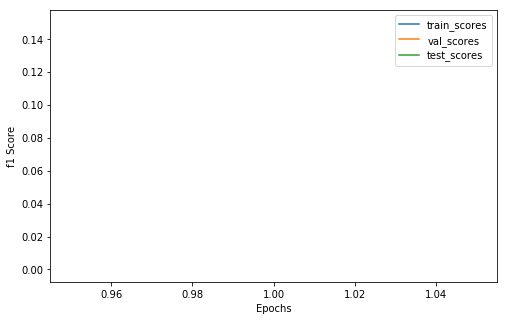

xxxxxxxxxxxxxx epoch: 1 xxxxxxxxxxxxxx


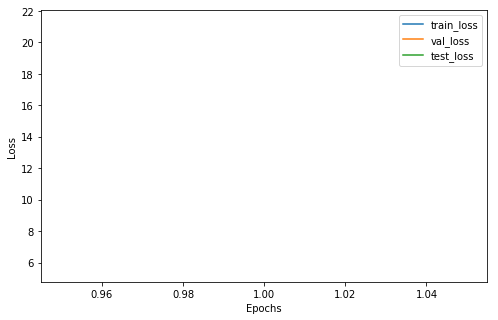

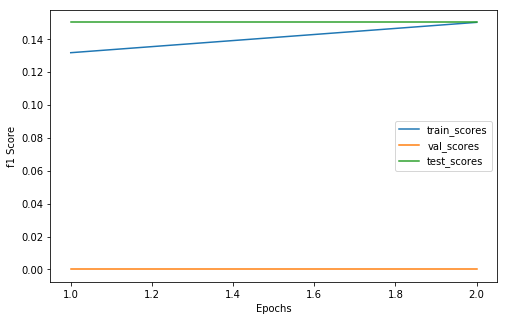

xxxxxxxxxxxxxx epoch: 2 xxxxxxxxxxxxxx


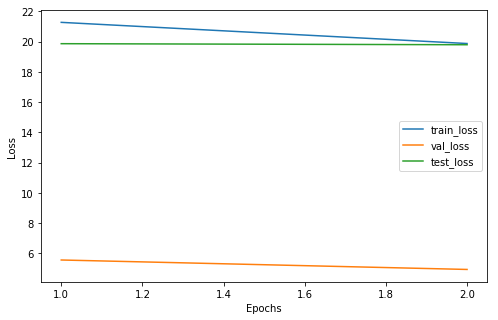

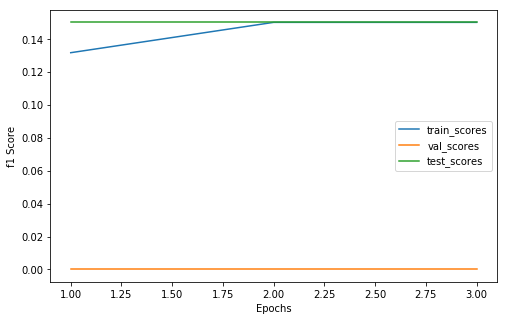

xxxxxxxxxxxxxx epoch: 3 xxxxxxxxxxxxxx


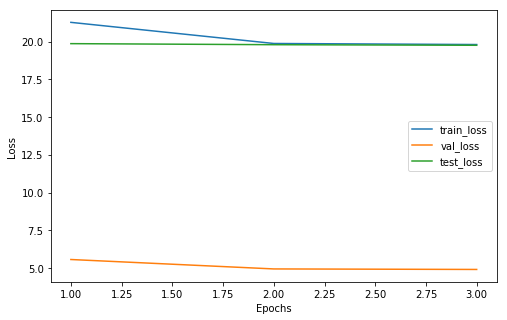

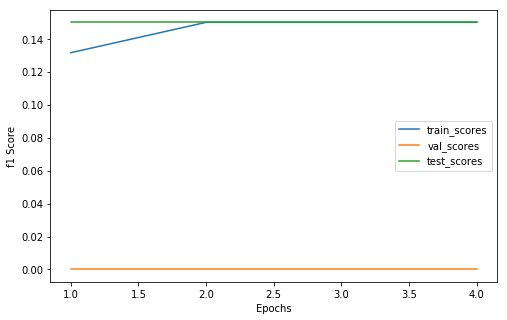

xxxxxxxxxxxxxx epoch: 4 xxxxxxxxxxxxxx


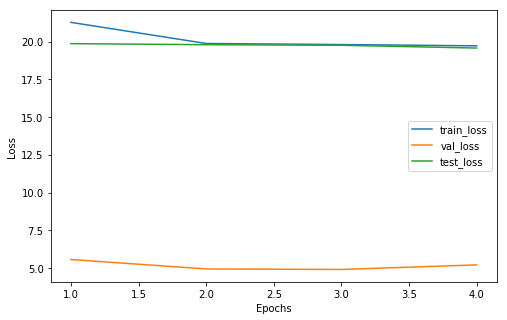

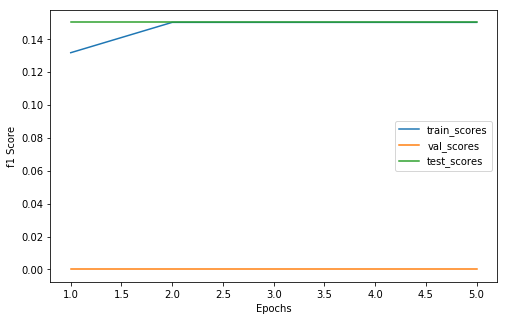

xxxxxxxxxxxxxx epoch: 5 xxxxxxxxxxxxxx


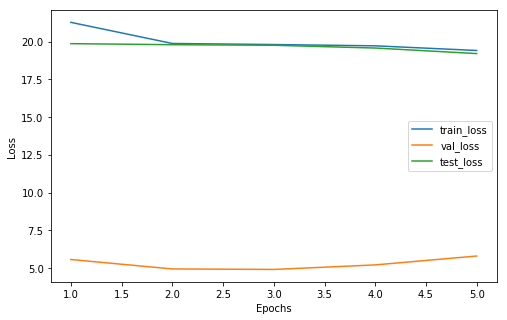

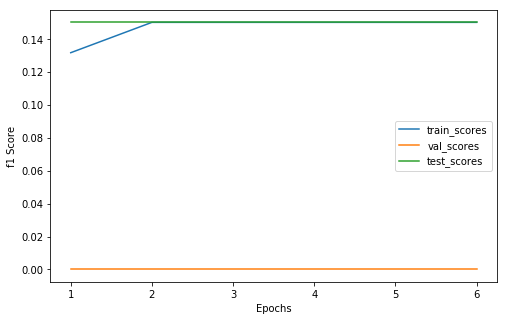

xxxxxxxxxxxxxx epoch: 6 xxxxxxxxxxxxxx


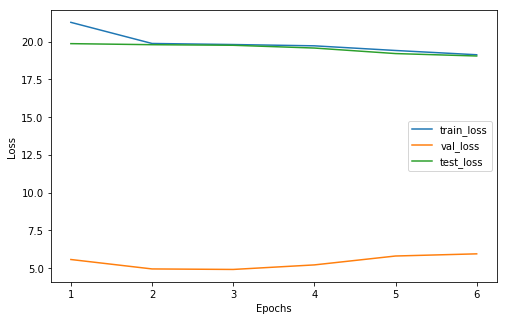

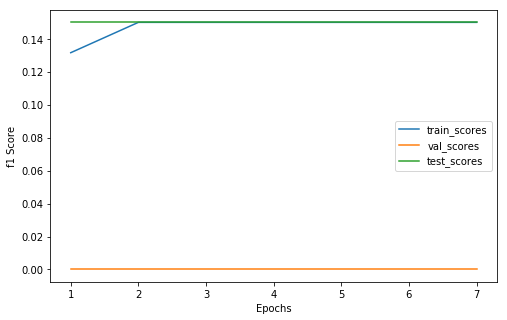

xxxxxxxxxxxxxx epoch: 7 xxxxxxxxxxxxxx


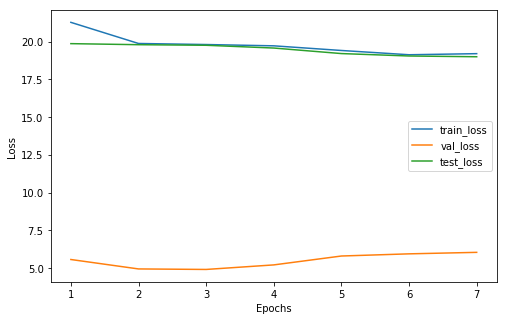

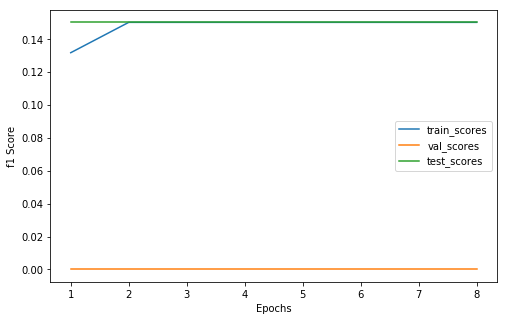

xxxxxxxxxxxxxx epoch: 8 xxxxxxxxxxxxxx


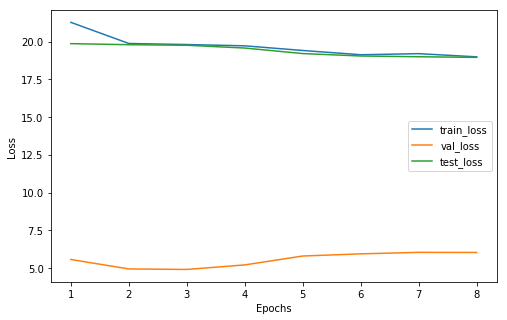

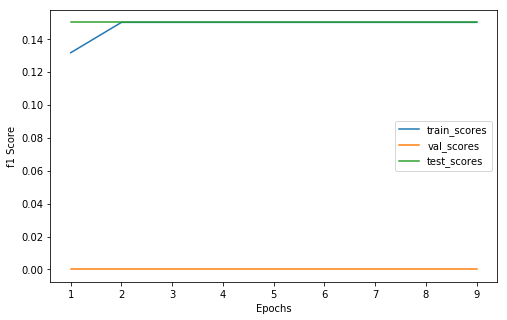

xxxxxxxxxxxxxx epoch: 9 xxxxxxxxxxxxxx


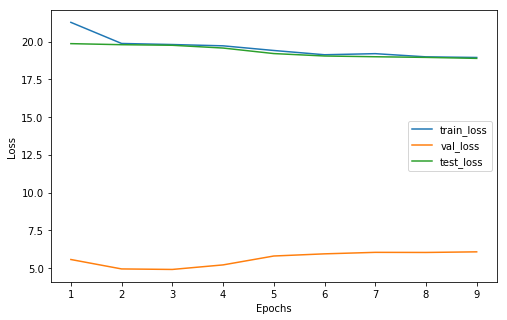

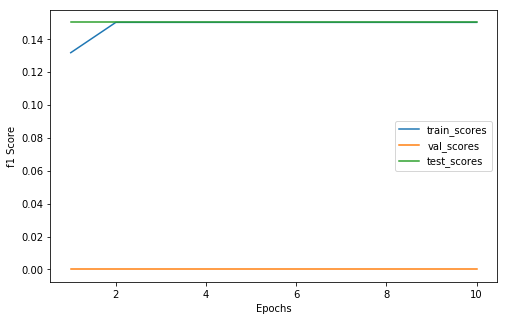

xxxxxxxxxxxxxx epoch: 10 xxxxxxxxxxxxxx


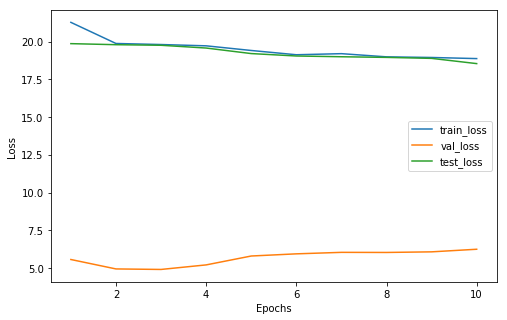

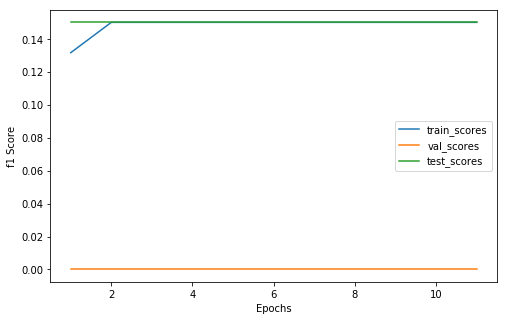

xxxxxxxxxxxxxx epoch: 11 xxxxxxxxxxxxxx


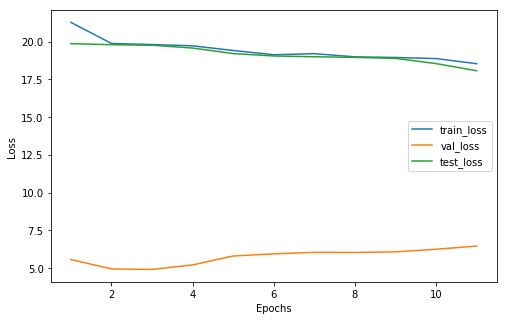

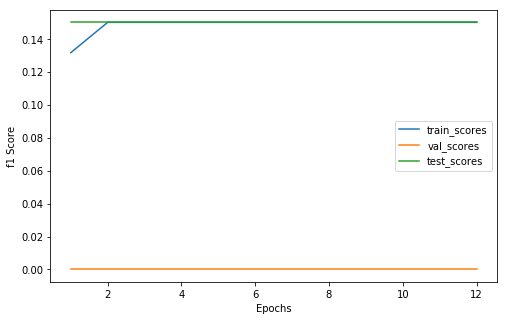

xxxxxxxxxxxxxx epoch: 12 xxxxxxxxxxxxxx


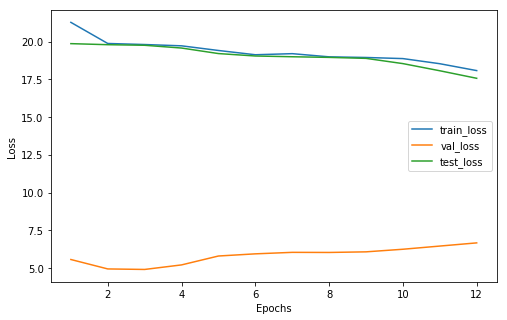

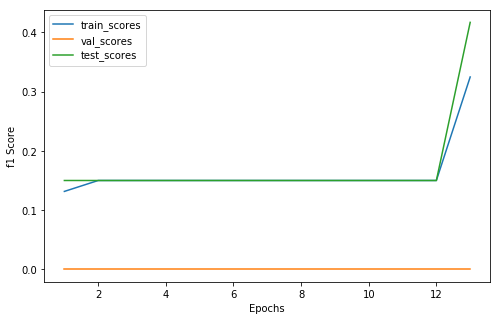

xxxxxxxxxxxxxx epoch: 13 xxxxxxxxxxxxxx


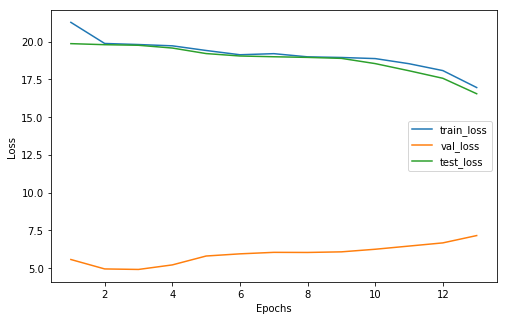

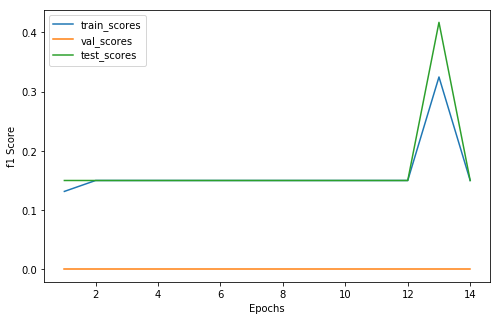

xxxxxxxxxxxxxx epoch: 14 xxxxxxxxxxxxxx


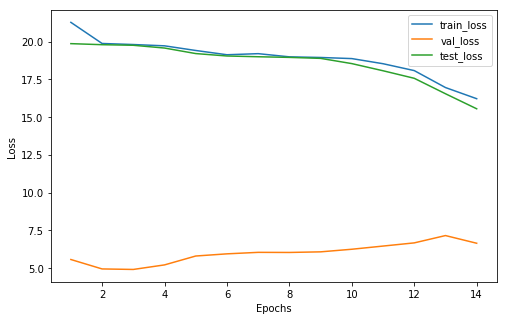

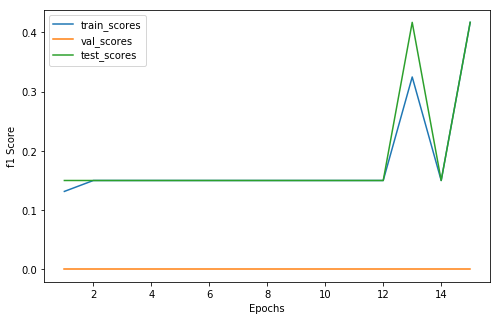

xxxxxxxxxxxxxx epoch: 15 xxxxxxxxxxxxxx


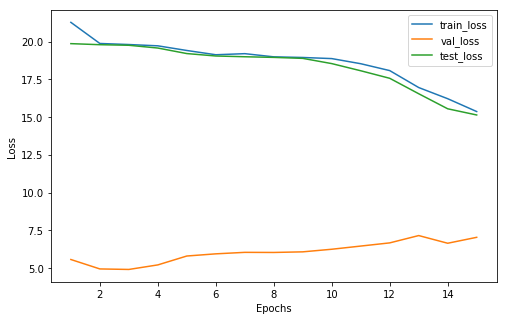

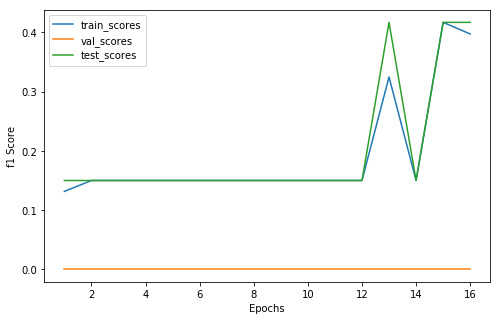

xxxxxxxxxxxxxx epoch: 16 xxxxxxxxxxxxxx


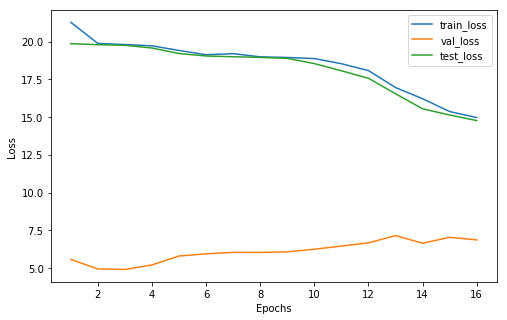

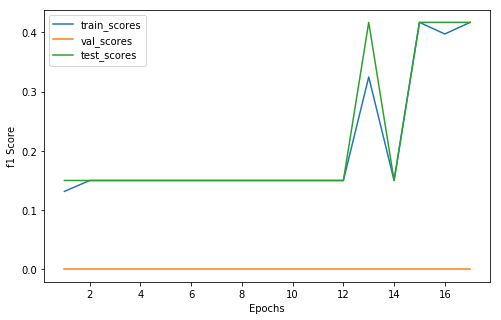

xxxxxxxxxxxxxx epoch: 17 xxxxxxxxxxxxxx


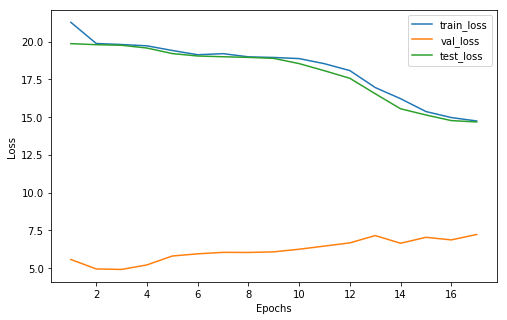

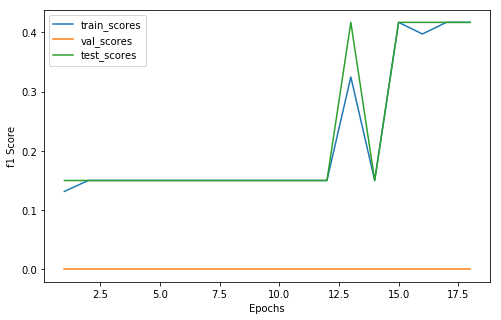

xxxxxxxxxxxxxx epoch: 18 xxxxxxxxxxxxxx


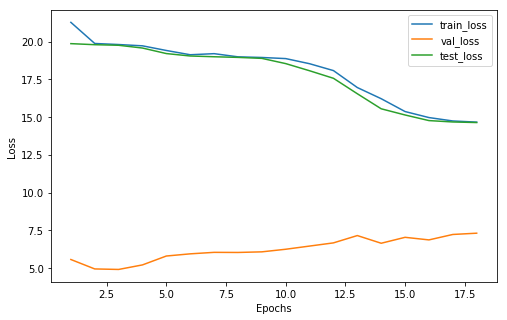

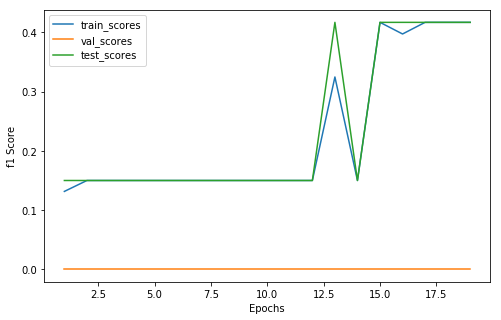

xxxxxxxxxxxxxx epoch: 19 xxxxxxxxxxxxxx


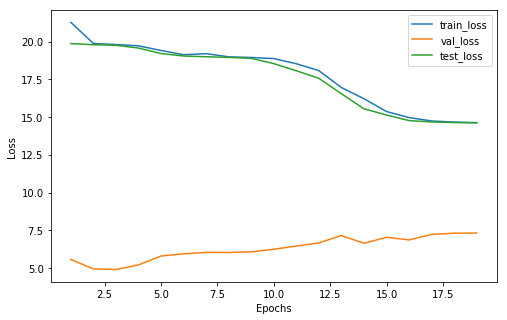

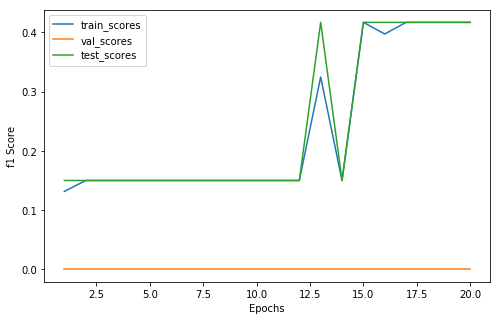

xxxxxxxxxxxxxx epoch: 20 xxxxxxxxxxxxxx


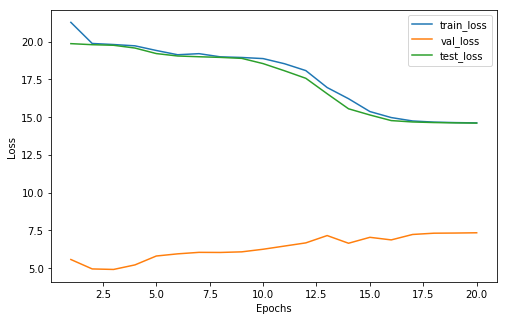

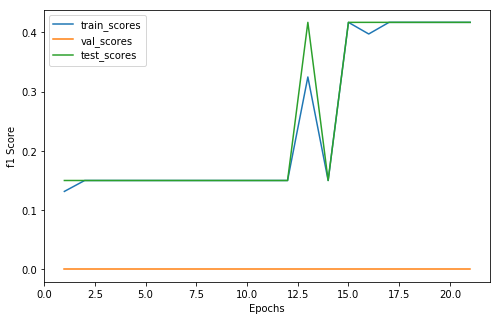

xxxxxxxxxxxxxx epoch: 21 xxxxxxxxxxxxxx


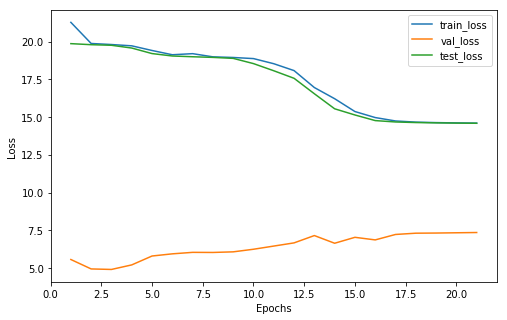

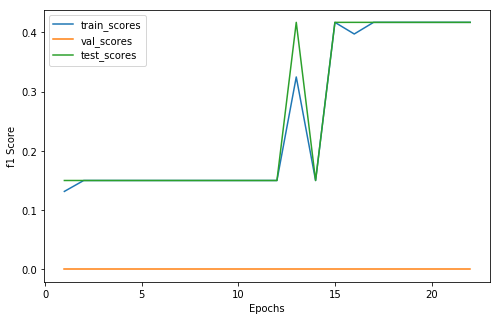

xxxxxxxxxxxxxx epoch: 22 xxxxxxxxxxxxxx


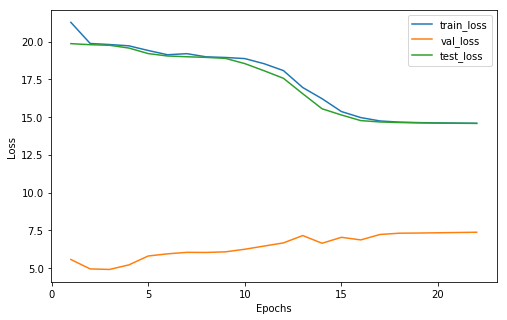

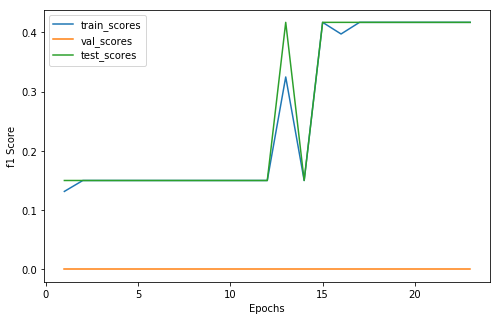

xxxxxxxxxxxxxx epoch: 23 xxxxxxxxxxxxxx


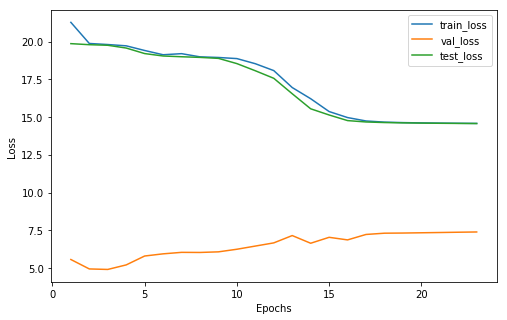

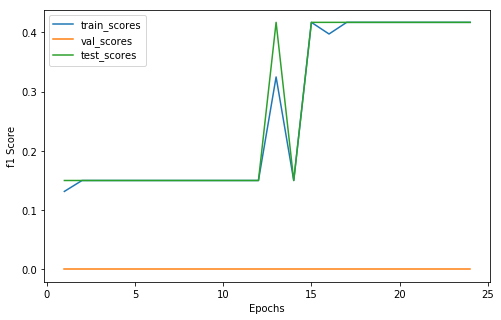

xxxxxxxxxxxxxx epoch: 24 xxxxxxxxxxxxxx


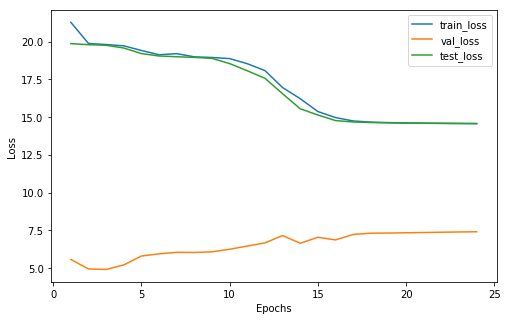

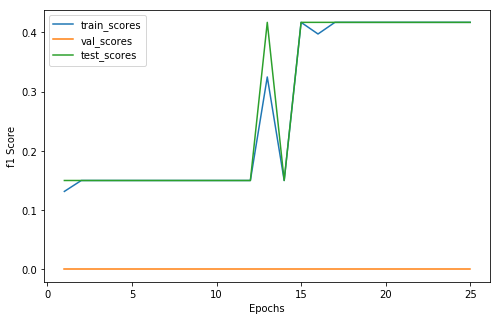

xxxxxxxxxxxxxx epoch: 25 xxxxxxxxxxxxxx


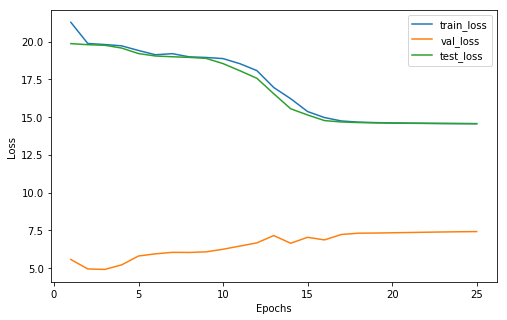

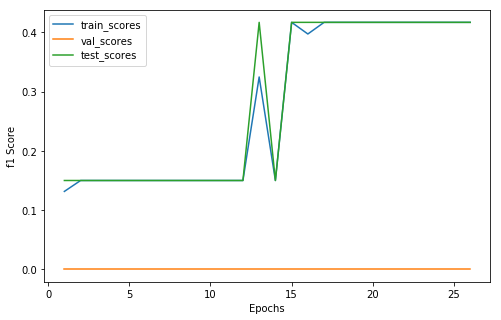

xxxxxxxxxxxxxx epoch: 26 xxxxxxxxxxxxxx


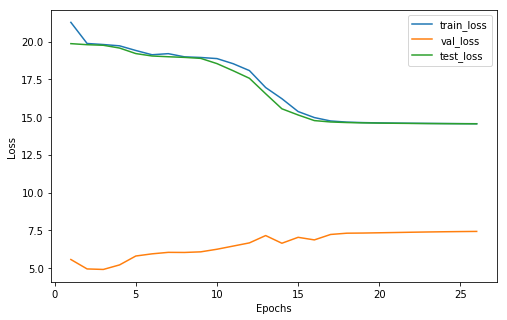

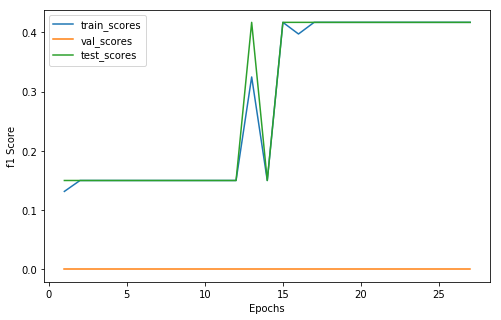

xxxxxxxxxxxxxx epoch: 27 xxxxxxxxxxxxxx


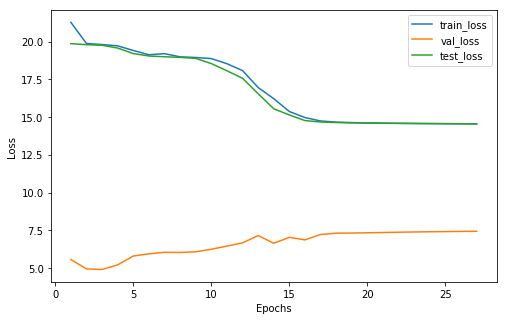

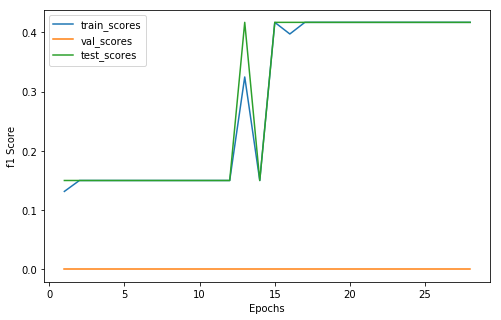

xxxxxxxxxxxxxx epoch: 28 xxxxxxxxxxxxxx


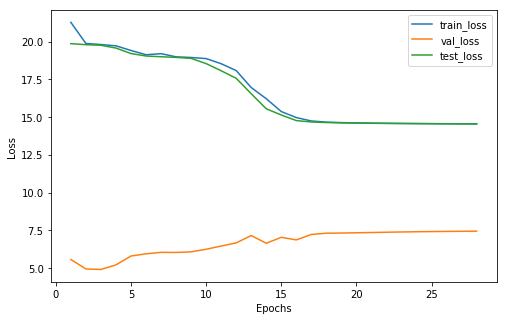

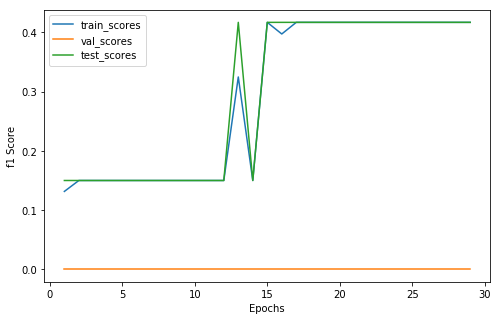

xxxxxxxxxxxxxx epoch: 29 xxxxxxxxxxxxxx


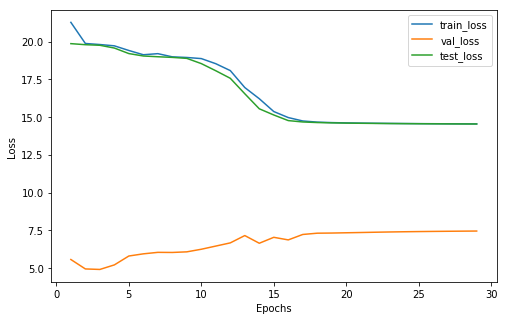

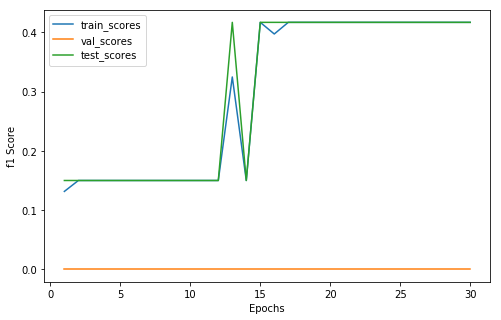

xxxxxxxxxxxxxx epoch: 30 xxxxxxxxxxxxxx


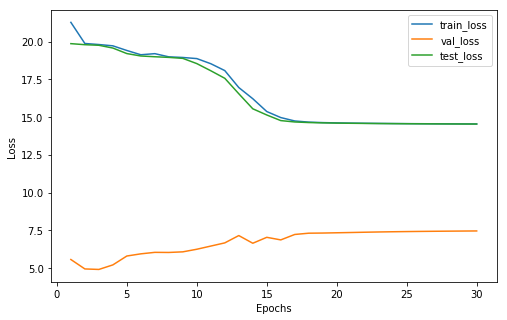

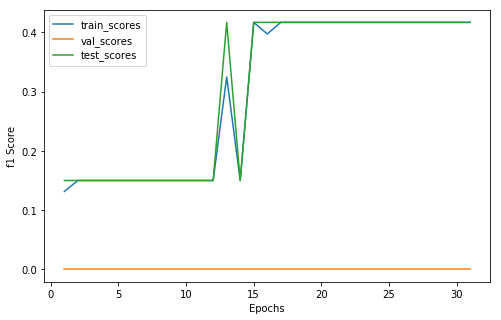

xxxxxxxxxxxxxx epoch: 31 xxxxxxxxxxxxxx


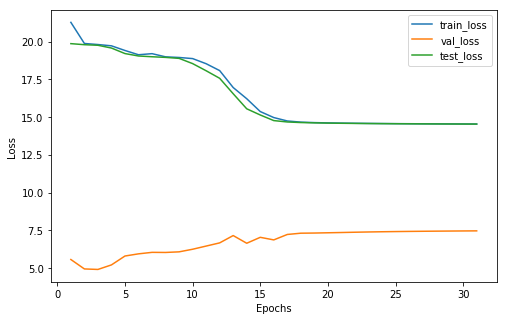

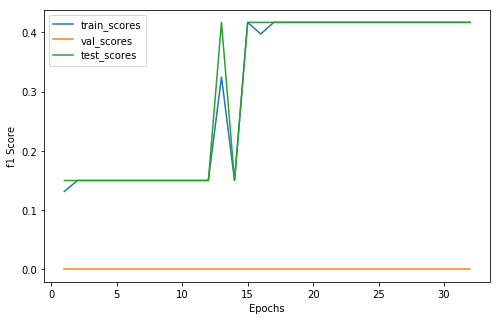

xxxxxxxxxxxxxx epoch: 32 xxxxxxxxxxxxxx


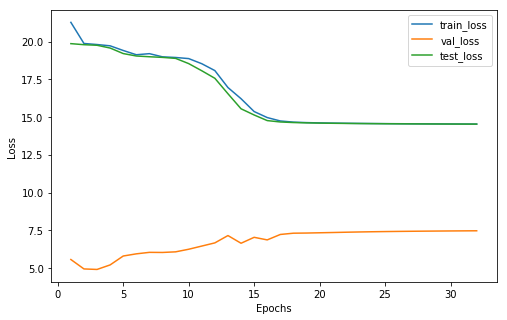

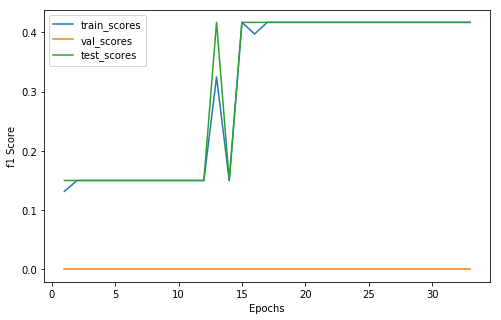

xxxxxxxxxxxxxx epoch: 33 xxxxxxxxxxxxxx


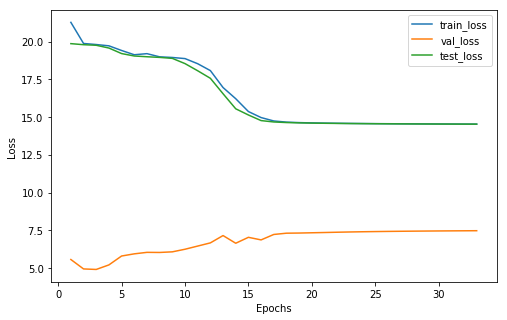

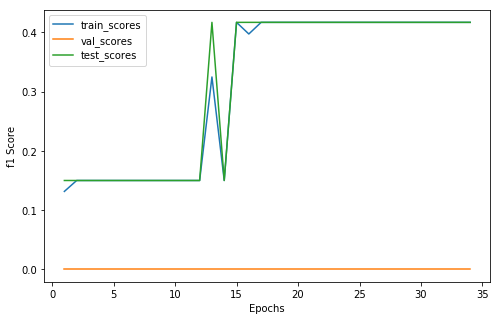

xxxxxxxxxxxxxx epoch: 34 xxxxxxxxxxxxxx


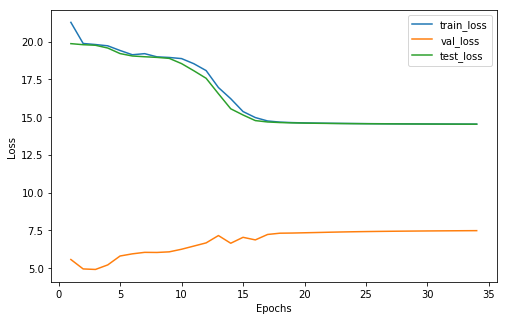

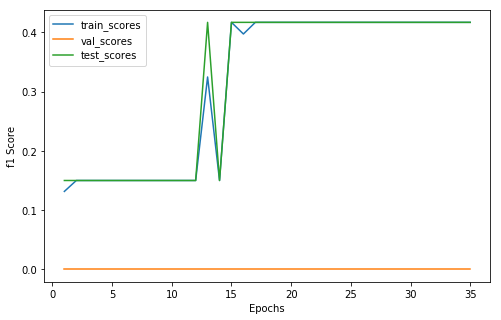

xxxxxxxxxxxxxx epoch: 35 xxxxxxxxxxxxxx


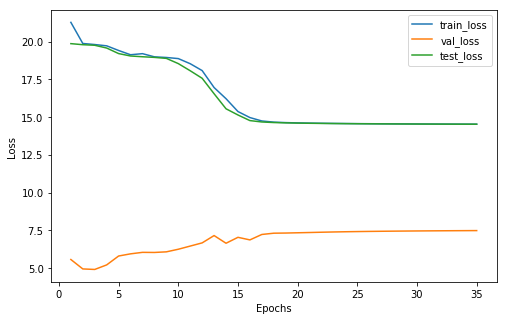

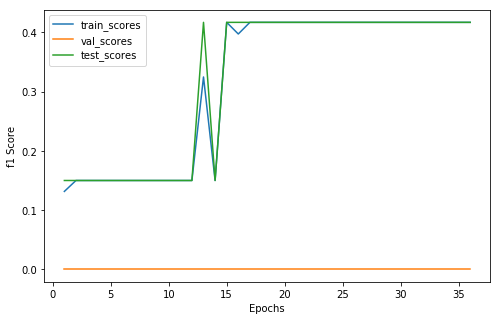

xxxxxxxxxxxxxx epoch: 36 xxxxxxxxxxxxxx


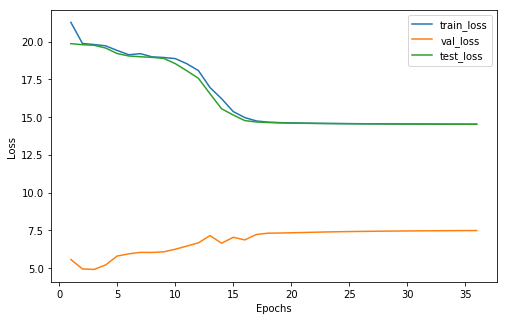

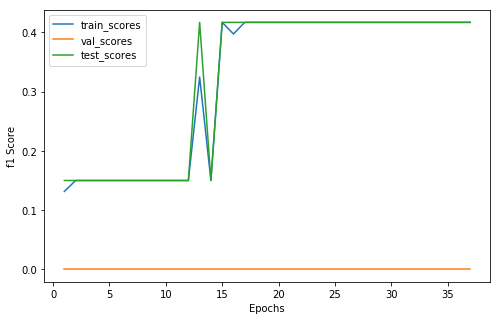

xxxxxxxxxxxxxx epoch: 37 xxxxxxxxxxxxxx


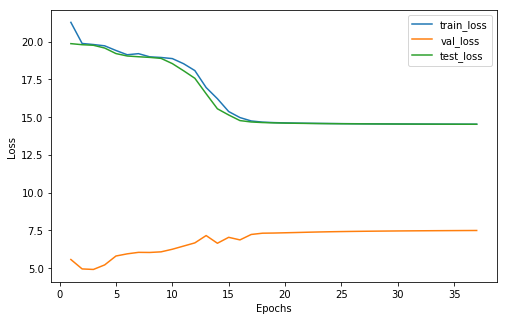

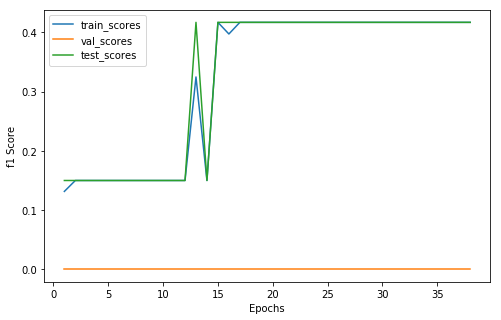

xxxxxxxxxxxxxx epoch: 38 xxxxxxxxxxxxxx


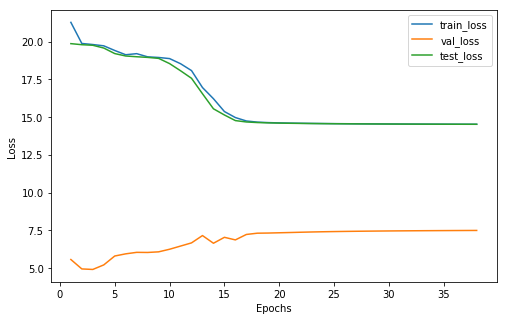

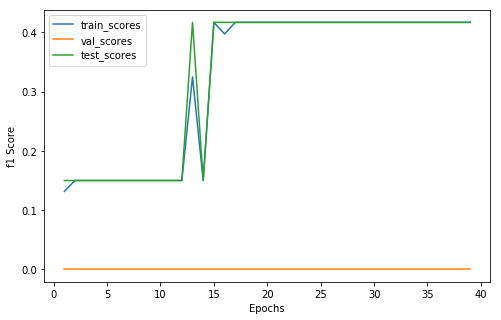

xxxxxxxxxxxxxx epoch: 39 xxxxxxxxxxxxxx


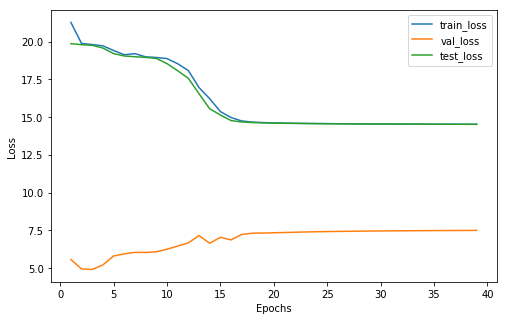

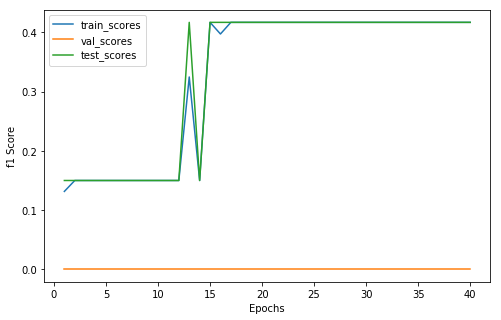

xxxxxxxxxxxxxx epoch: 40 xxxxxxxxxxxxxx


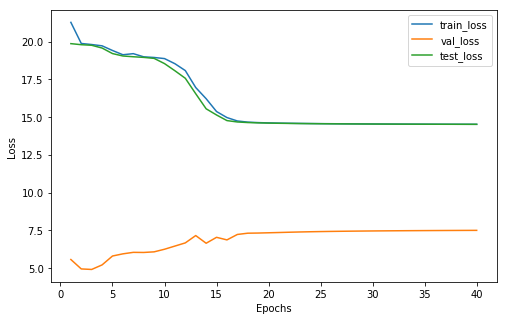

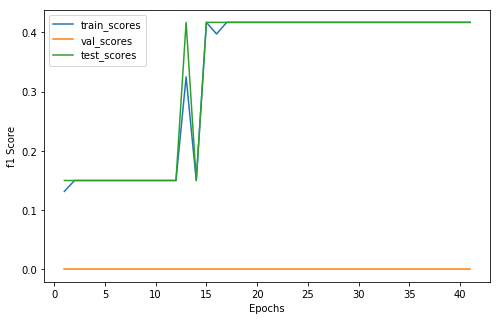

xxxxxxxxxxxxxx epoch: 41 xxxxxxxxxxxxxx


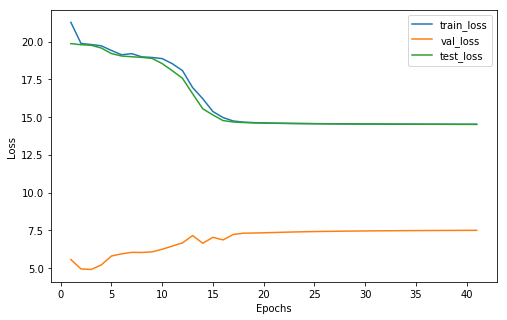

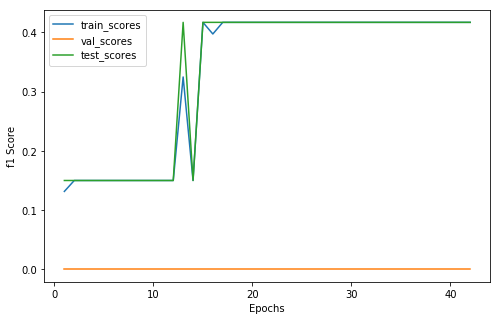

xxxxxxxxxxxxxx epoch: 42 xxxxxxxxxxxxxx


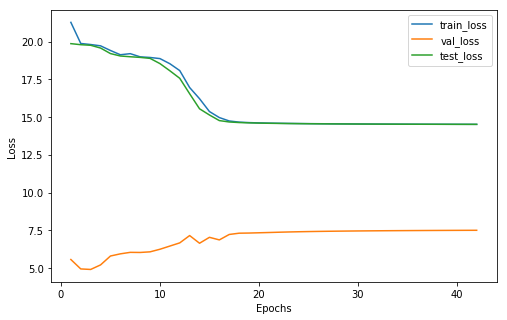

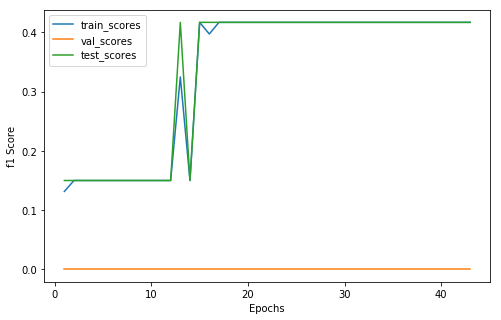

xxxxxxxxxxxxxx epoch: 43 xxxxxxxxxxxxxx


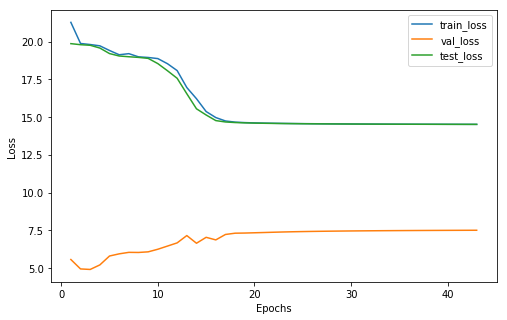

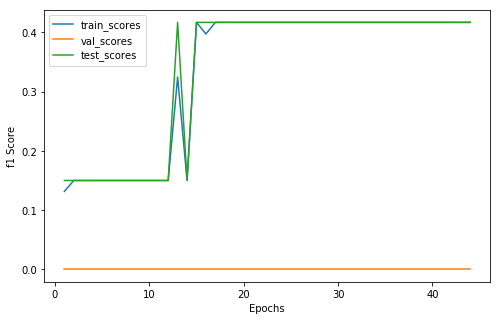

xxxxxxxxxxxxxx epoch: 44 xxxxxxxxxxxxxx


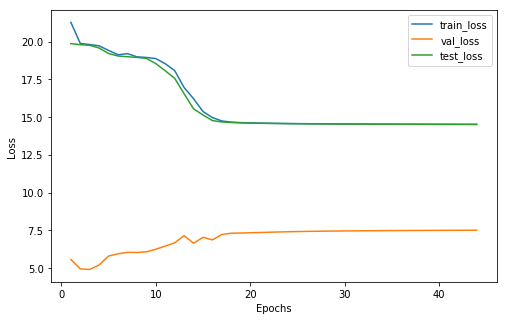

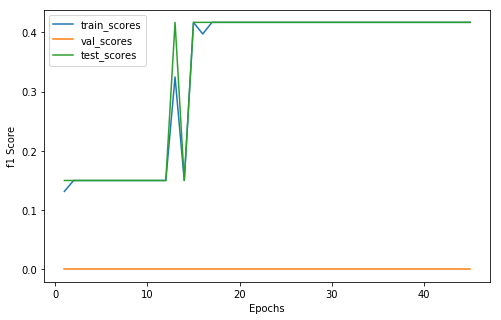

xxxxxxxxxxxxxx epoch: 45 xxxxxxxxxxxxxx


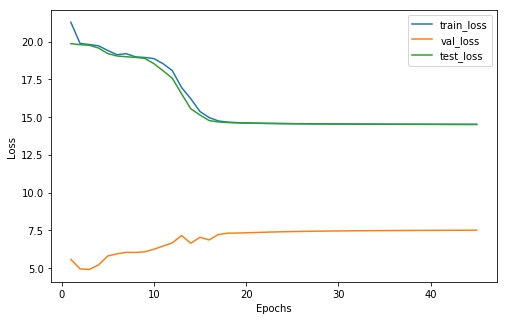

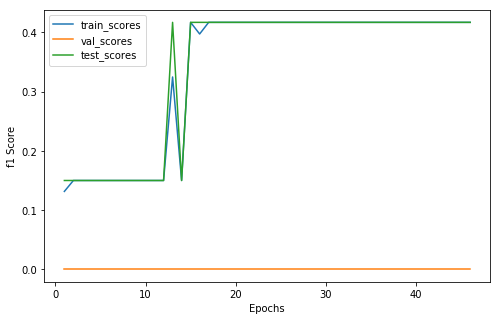

xxxxxxxxxxxxxx epoch: 46 xxxxxxxxxxxxxx


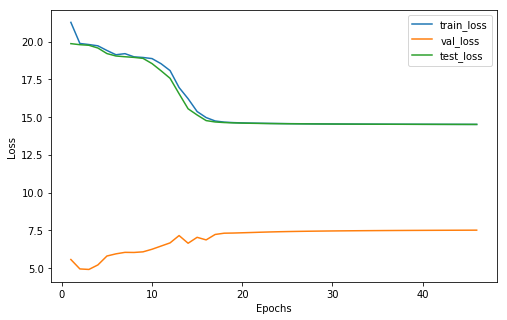

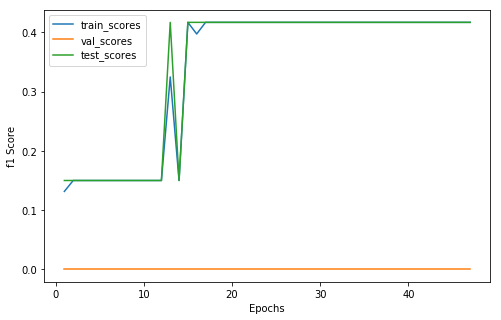

xxxxxxxxxxxxxx epoch: 47 xxxxxxxxxxxxxx


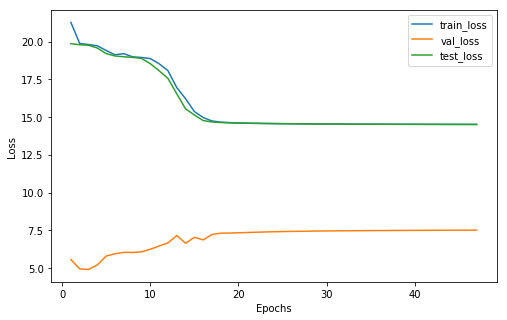

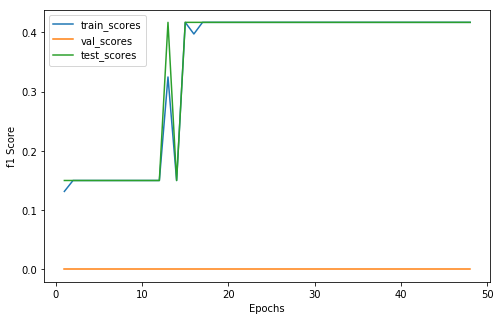

xxxxxxxxxxxxxx epoch: 48 xxxxxxxxxxxxxx


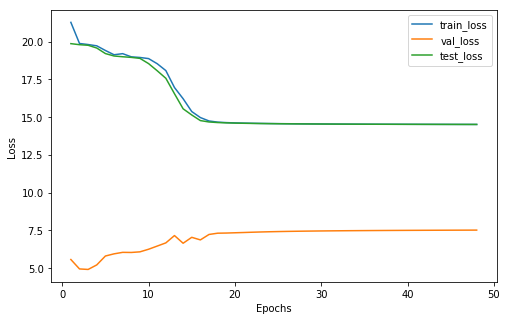

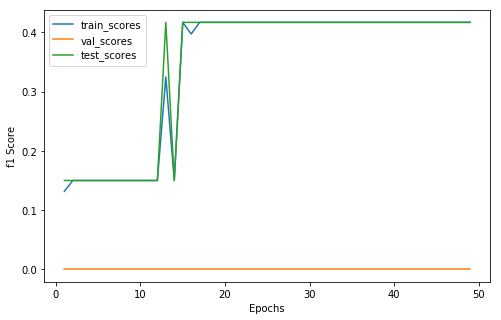

xxxxxxxxxxxxxx epoch: 49 xxxxxxxxxxxxxx


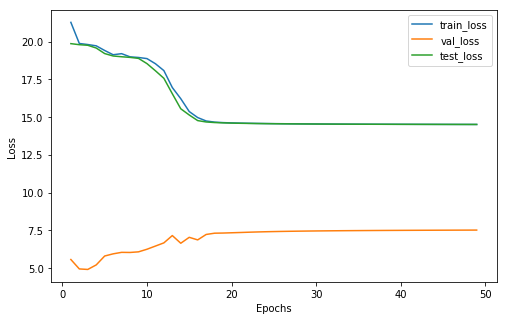

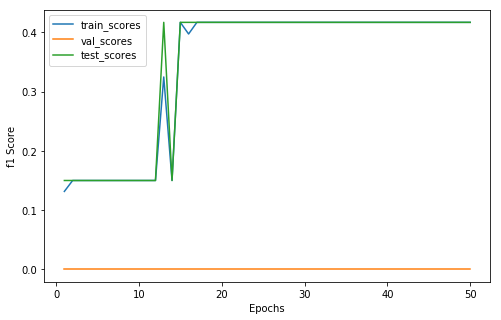

xxxxxxxxxxxxxx epoch: 50 xxxxxxxxxxxxxx


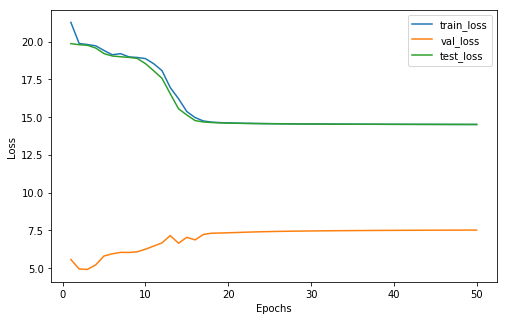

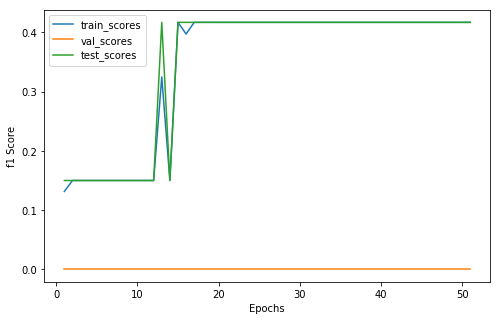

xxxxxxxxxxxxxx epoch: 51 xxxxxxxxxxxxxx


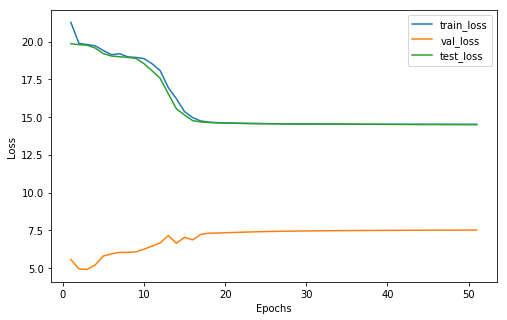

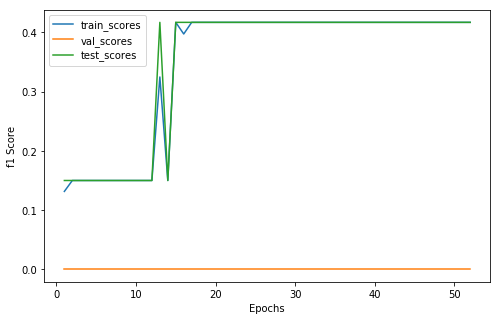

xxxxxxxxxxxxxx epoch: 52 xxxxxxxxxxxxxx


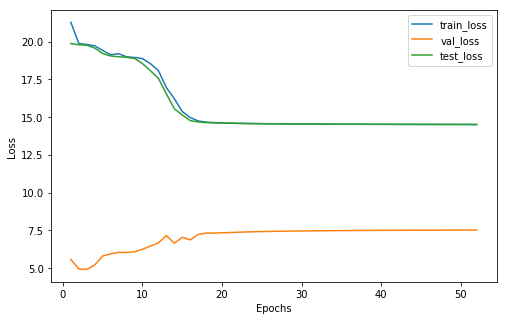

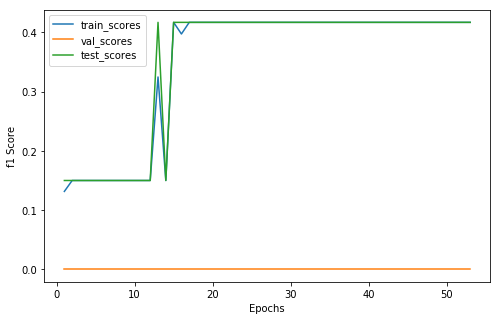

xxxxxxxxxxxxxx epoch: 53 xxxxxxxxxxxxxx


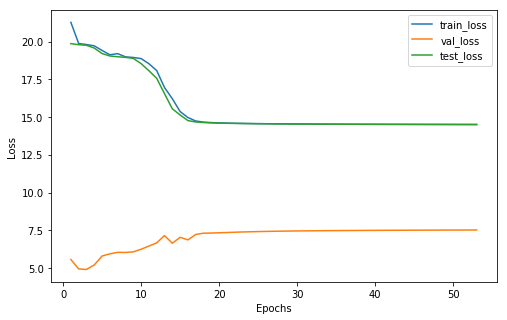

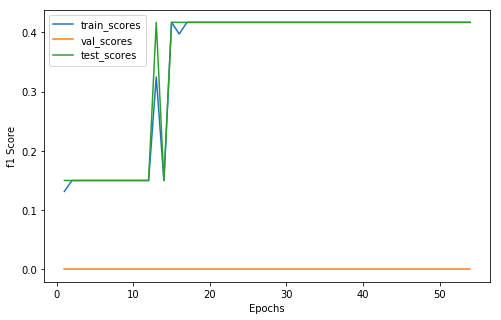

xxxxxxxxxxxxxx epoch: 54 xxxxxxxxxxxxxx


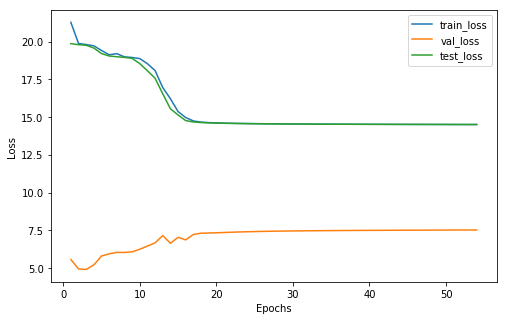

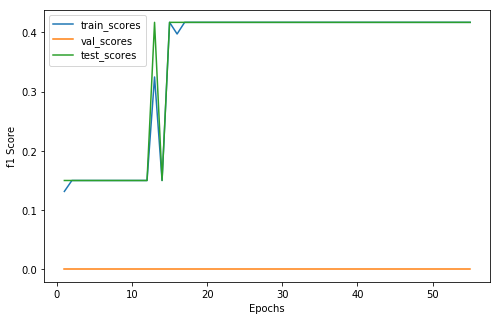

xxxxxxxxxxxxxx epoch: 55 xxxxxxxxxxxxxx


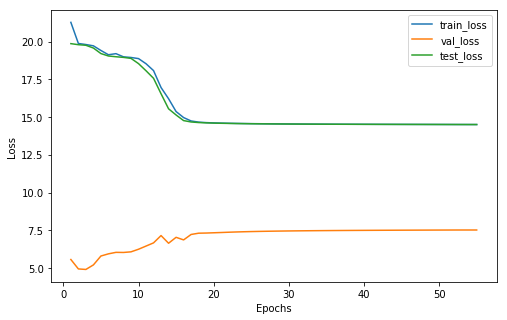

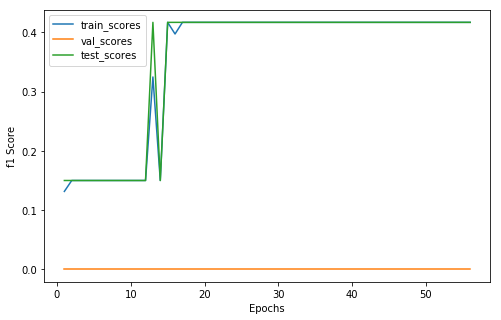

xxxxxxxxxxxxxx epoch: 56 xxxxxxxxxxxxxx


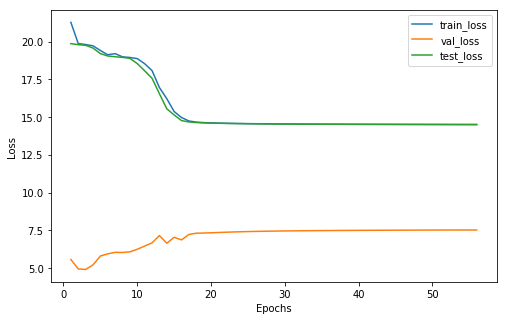

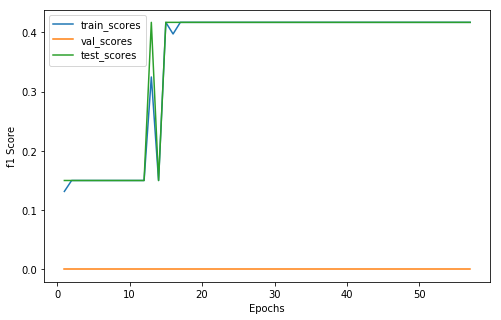

xxxxxxxxxxxxxx epoch: 57 xxxxxxxxxxxxxx


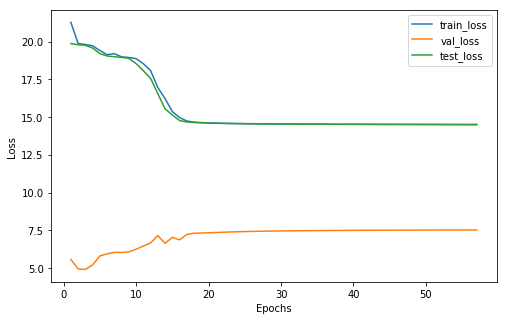

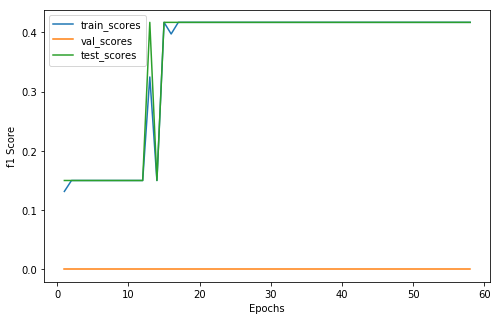

xxxxxxxxxxxxxx epoch: 58 xxxxxxxxxxxxxx


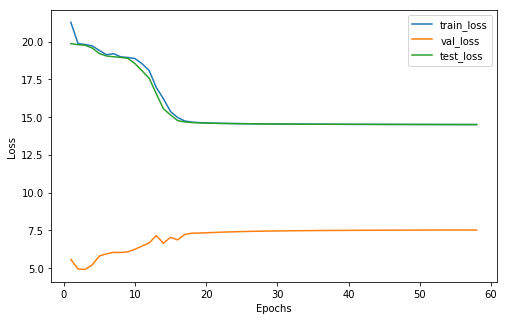

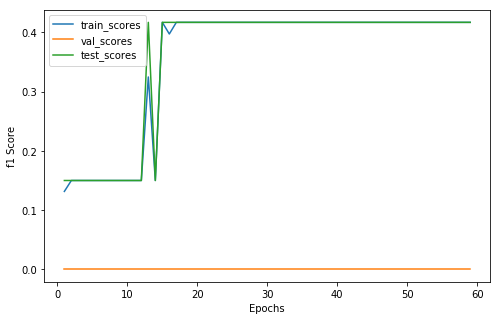

xxxxxxxxxxxxxx epoch: 59 xxxxxxxxxxxxxx


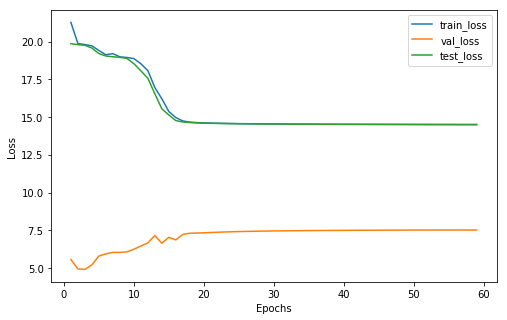

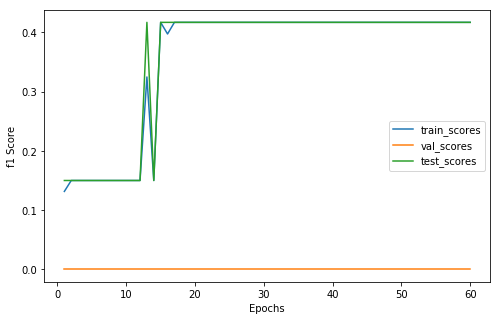

xxxxxxxxxxxxxx epoch: 60 xxxxxxxxxxxxxx


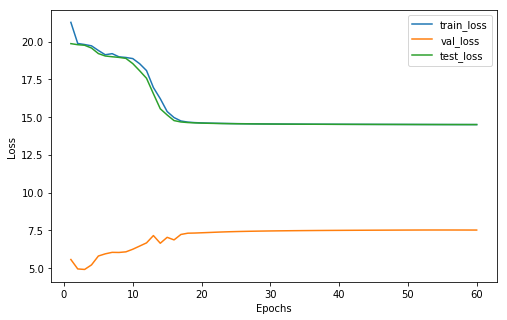

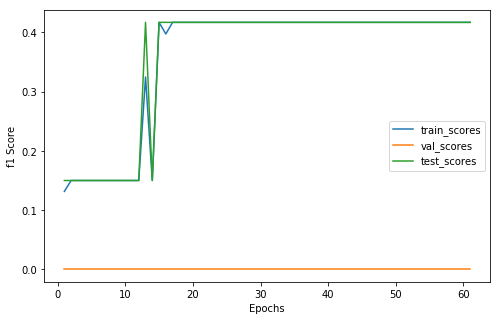

xxxxxxxxxxxxxx epoch: 61 xxxxxxxxxxxxxx


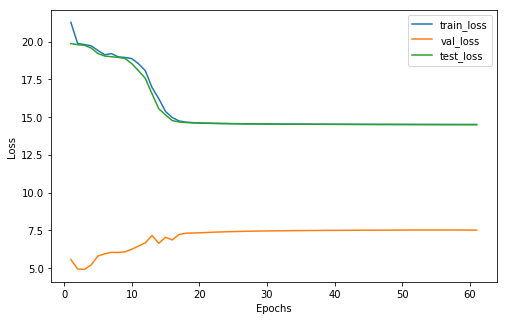

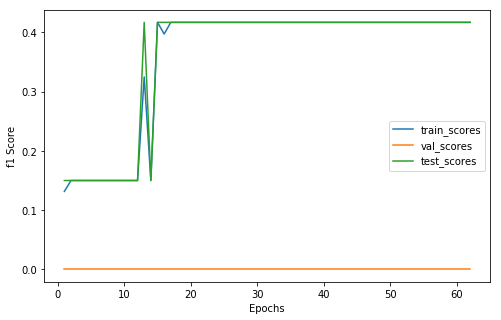

xxxxxxxxxxxxxx epoch: 62 xxxxxxxxxxxxxx


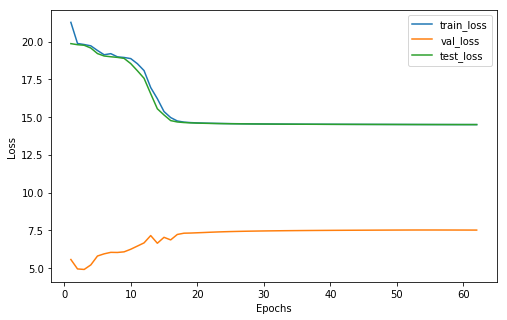

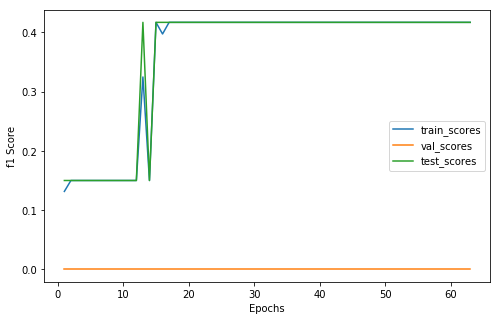

xxxxxxxxxxxxxx epoch: 63 xxxxxxxxxxxxxx


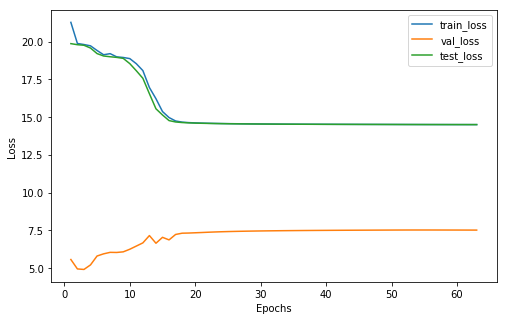

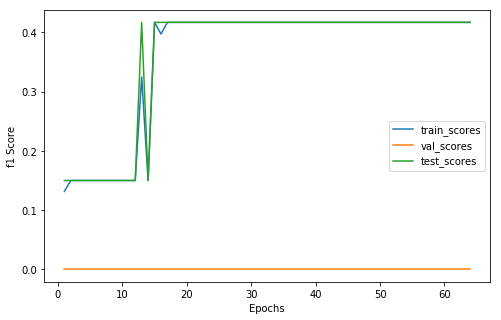

xxxxxxxxxxxxxx epoch: 64 xxxxxxxxxxxxxx


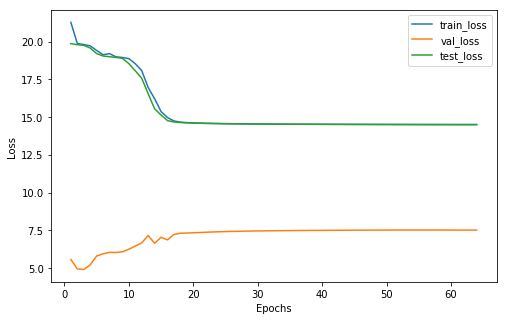

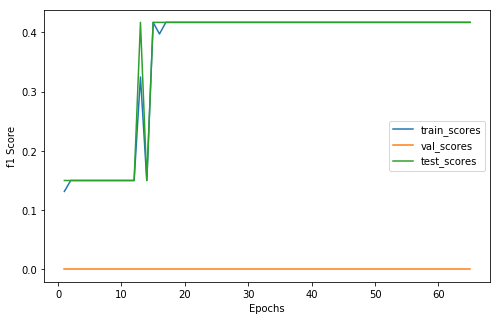

xxxxxxxxxxxxxx epoch: 65 xxxxxxxxxxxxxx


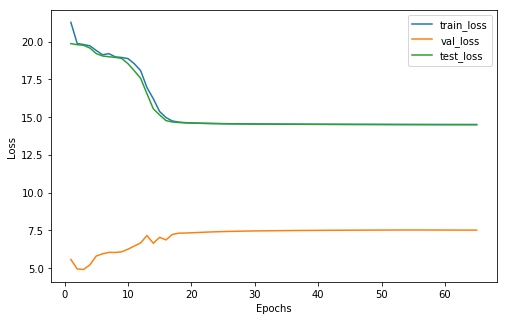

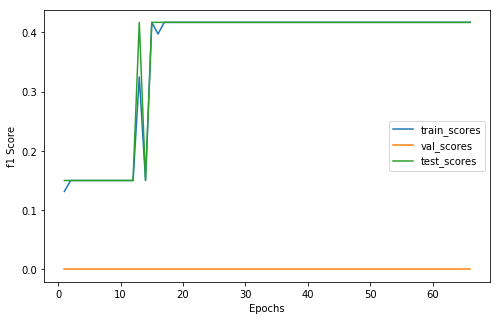

xxxxxxxxxxxxxx epoch: 66 xxxxxxxxxxxxxx


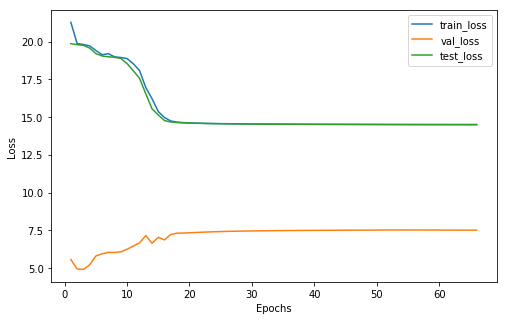

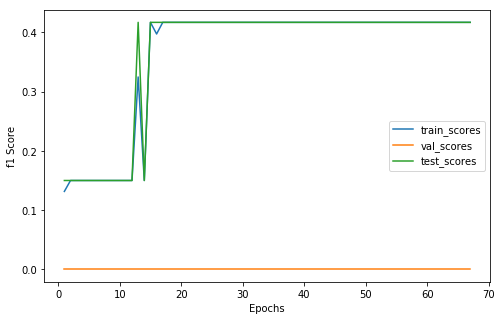

xxxxxxxxxxxxxx epoch: 67 xxxxxxxxxxxxxx


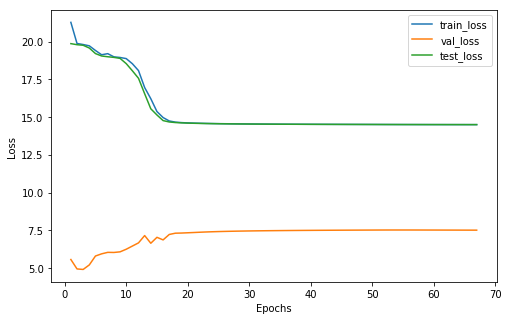

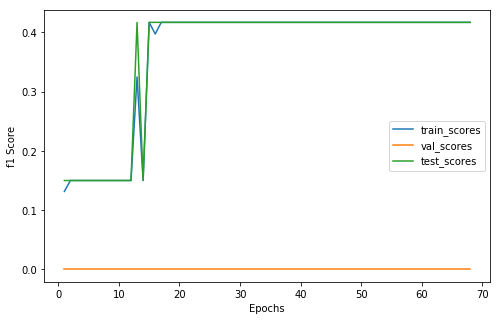

xxxxxxxxxxxxxx epoch: 68 xxxxxxxxxxxxxx


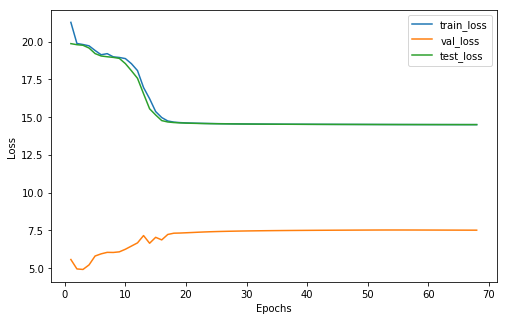

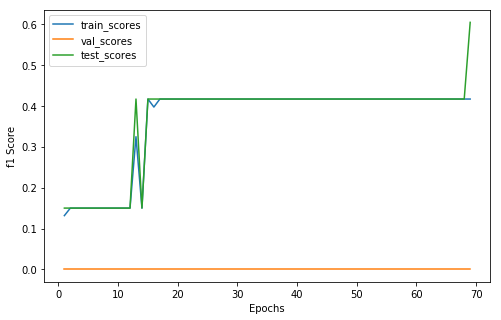

xxxxxxxxxxxxxx epoch: 69 xxxxxxxxxxxxxx


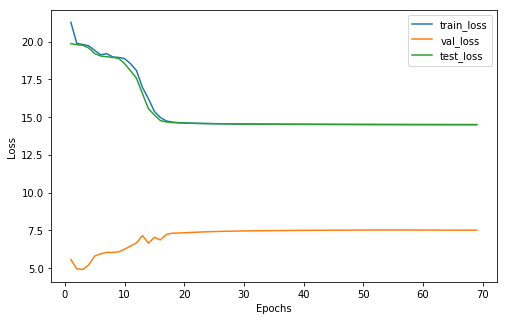

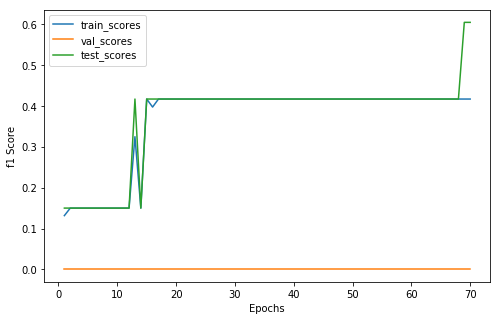

xxxxxxxxxxxxxx epoch: 70 xxxxxxxxxxxxxx


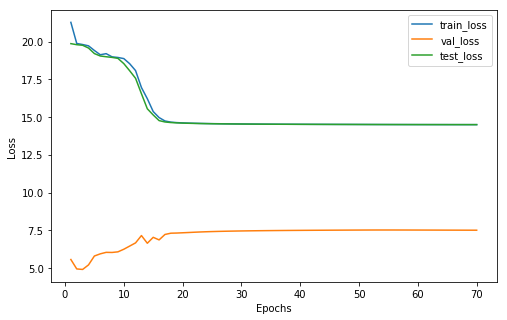

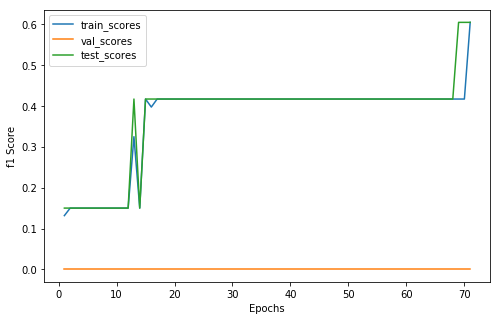

xxxxxxxxxxxxxx epoch: 71 xxxxxxxxxxxxxx


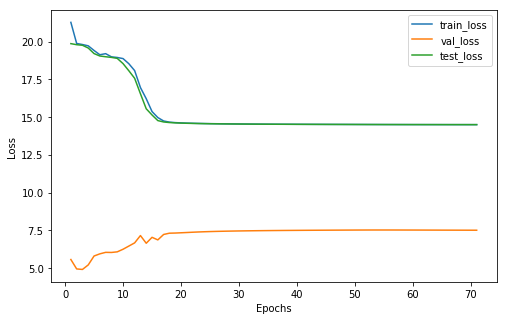

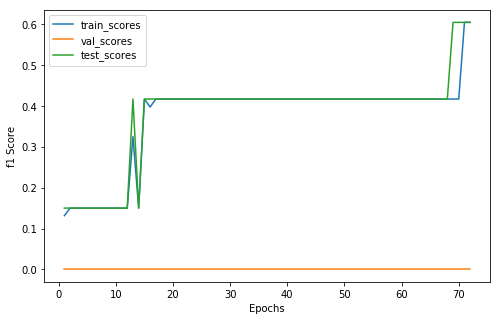

xxxxxxxxxxxxxx epoch: 72 xxxxxxxxxxxxxx


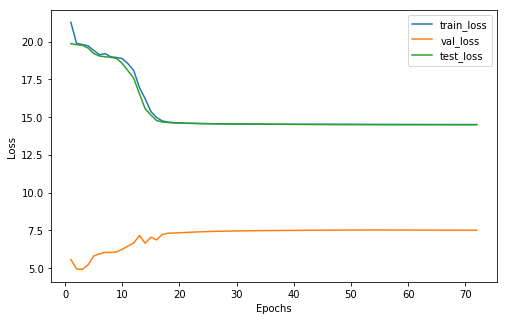

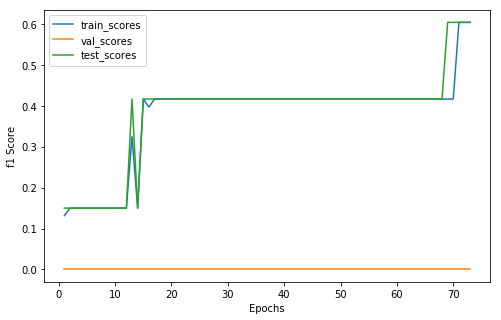

xxxxxxxxxxxxxx epoch: 73 xxxxxxxxxxxxxx


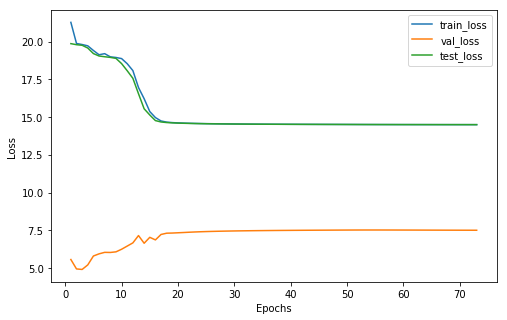

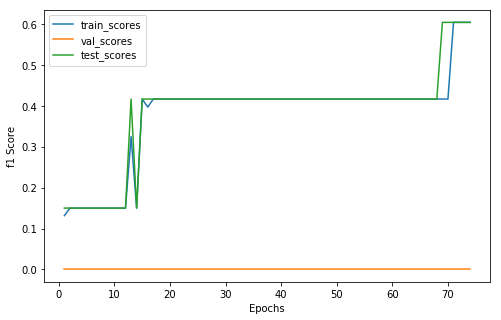

xxxxxxxxxxxxxx epoch: 74 xxxxxxxxxxxxxx


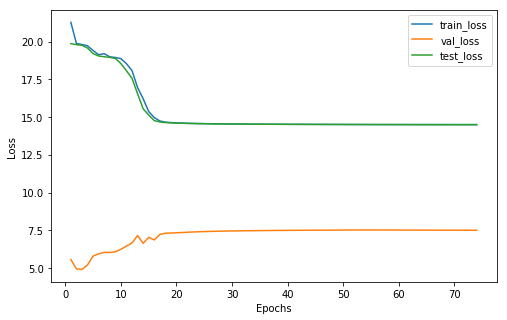

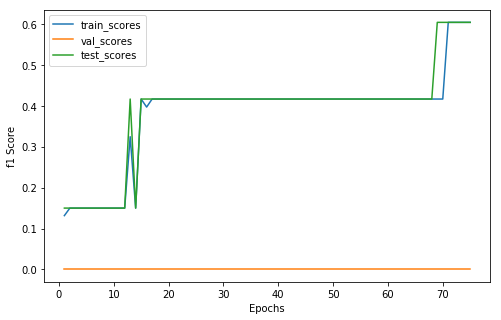

xxxxxxxxxxxxxx epoch: 75 xxxxxxxxxxxxxx


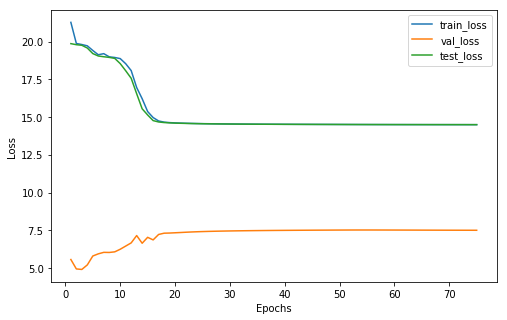

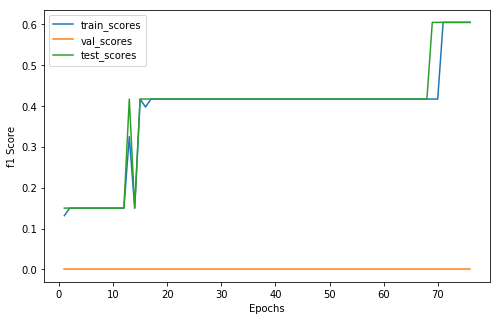

xxxxxxxxxxxxxx epoch: 76 xxxxxxxxxxxxxx


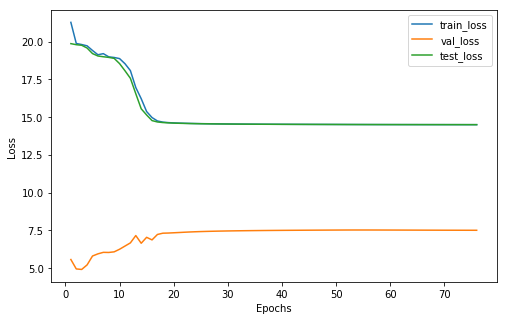

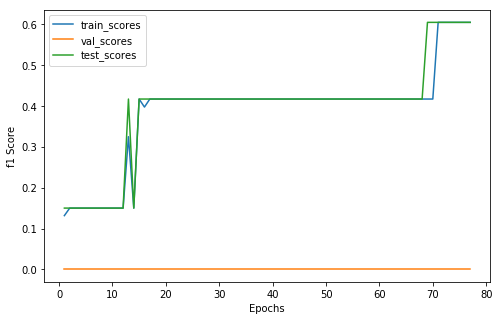

xxxxxxxxxxxxxx epoch: 77 xxxxxxxxxxxxxx


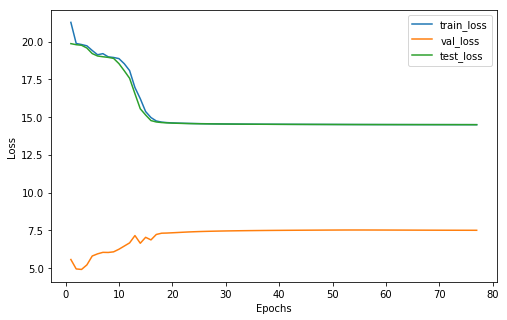

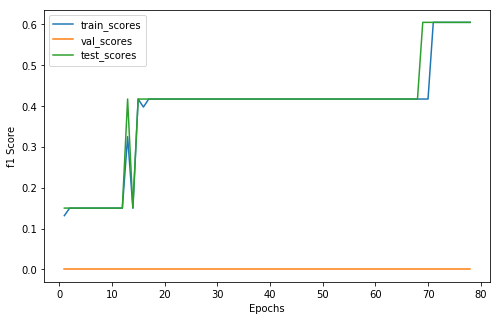

xxxxxxxxxxxxxx epoch: 78 xxxxxxxxxxxxxx


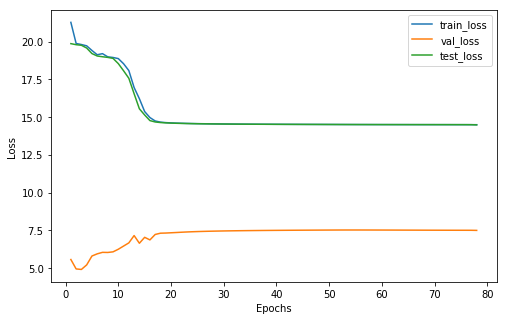

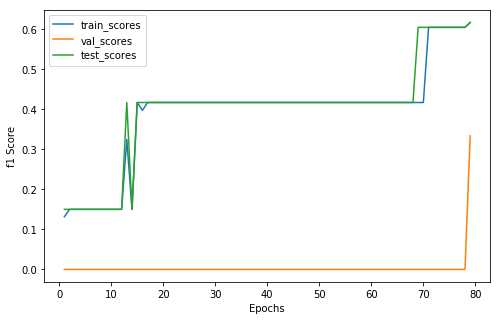

xxxxxxxxxxxxxx epoch: 79 xxxxxxxxxxxxxx


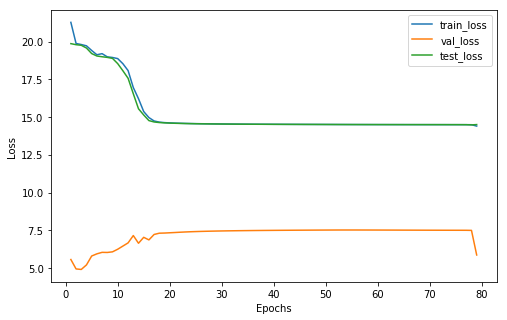

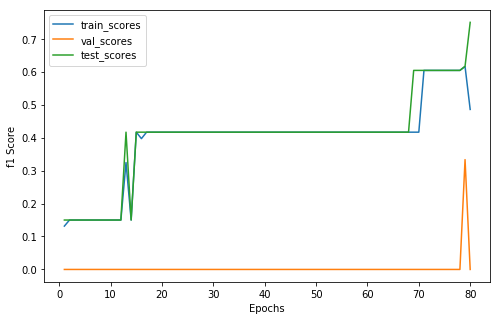

xxxxxxxxxxxxxx epoch: 80 xxxxxxxxxxxxxx


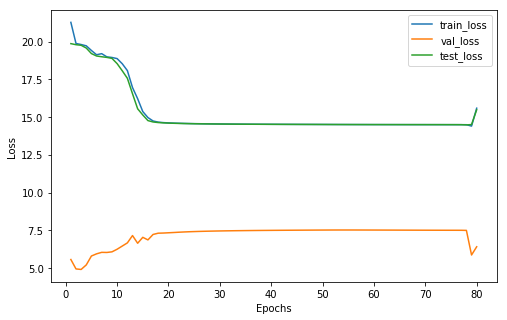

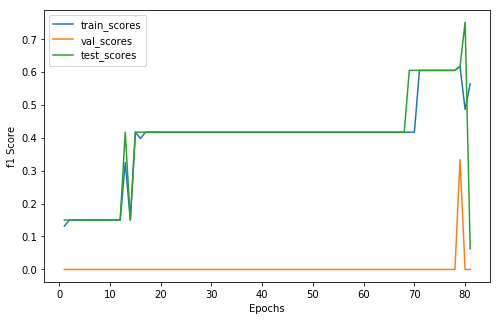

xxxxxxxxxxxxxx epoch: 81 xxxxxxxxxxxxxx


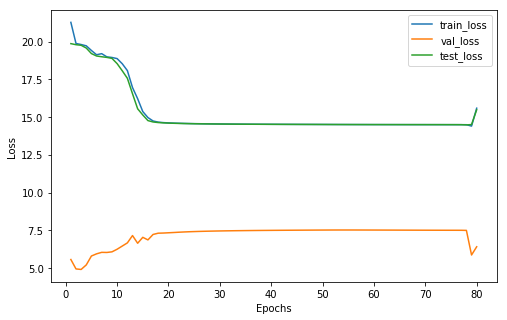

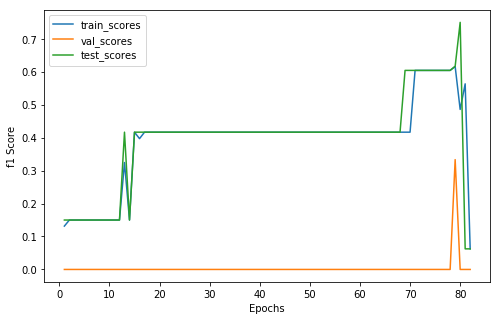

xxxxxxxxxxxxxx epoch: 82 xxxxxxxxxxxxxx


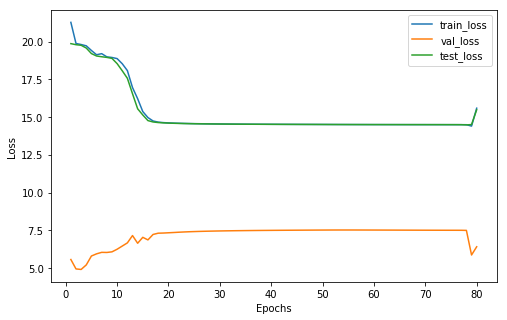

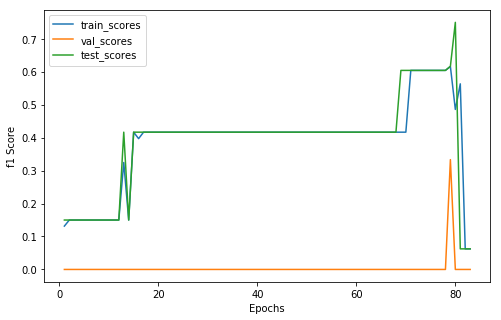

xxxxxxxxxxxxxx epoch: 83 xxxxxxxxxxxxxx


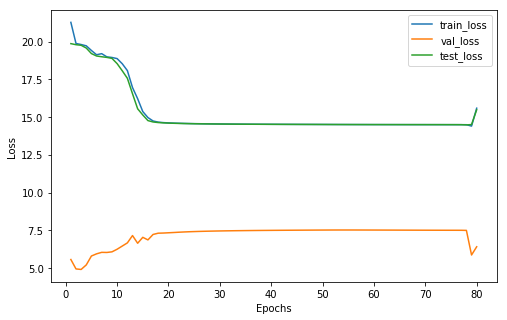

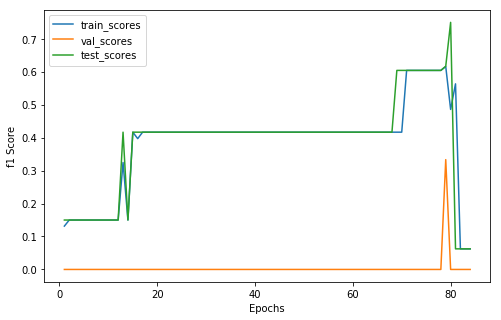

xxxxxxxxxxxxxx epoch: 84 xxxxxxxxxxxxxx


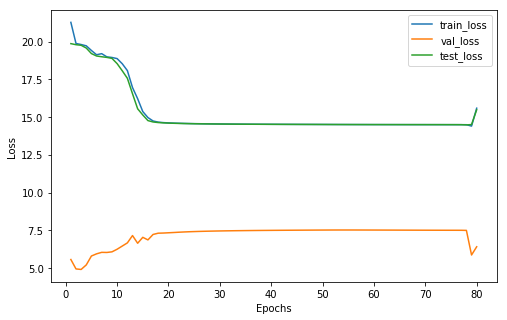

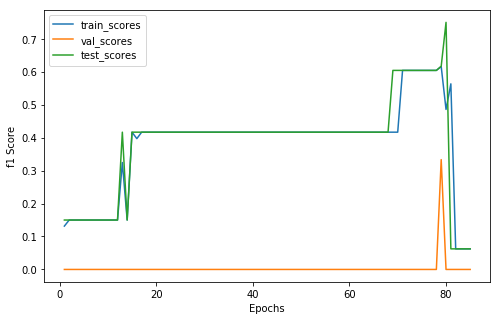

xxxxxxxxxxxxxx epoch: 85 xxxxxxxxxxxxxx


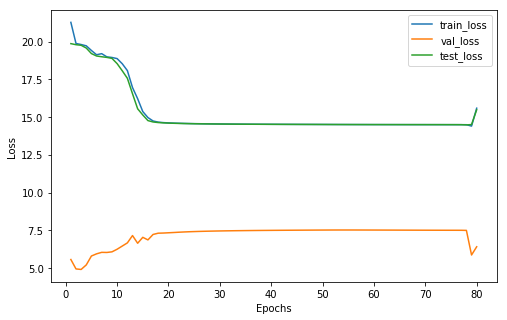

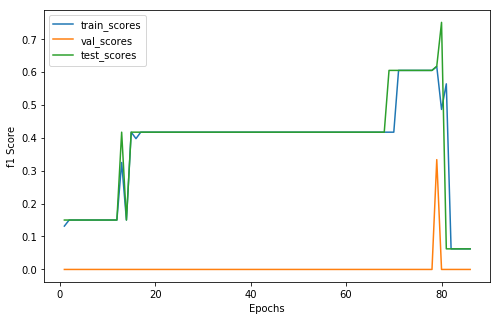

xxxxxxxxxxxxxx epoch: 86 xxxxxxxxxxxxxx


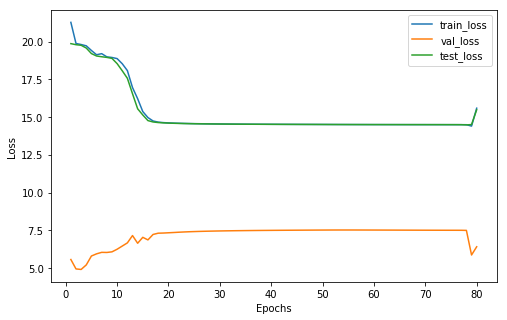

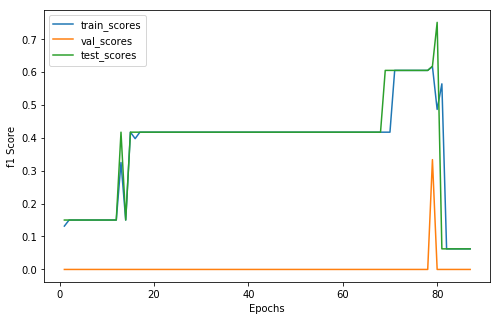

xxxxxxxxxxxxxx epoch: 87 xxxxxxxxxxxxxx


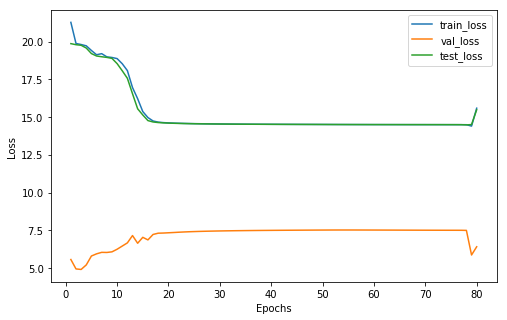

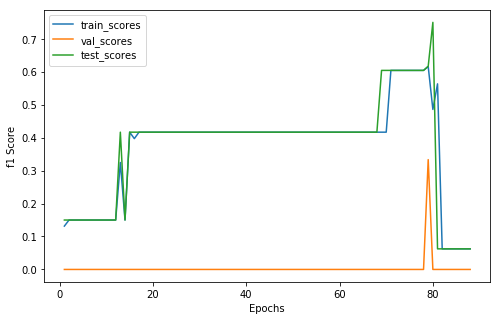

xxxxxxxxxxxxxx epoch: 88 xxxxxxxxxxxxxx


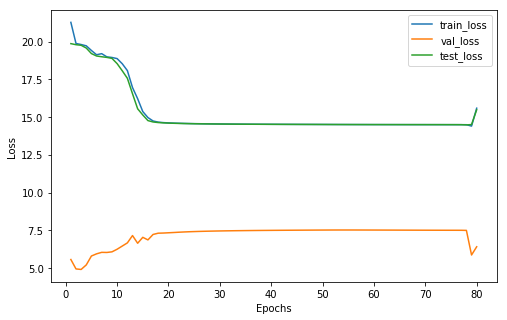

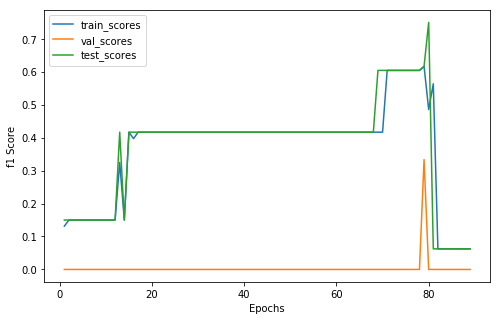

xxxxxxxxxxxxxx epoch: 89 xxxxxxxxxxxxxx


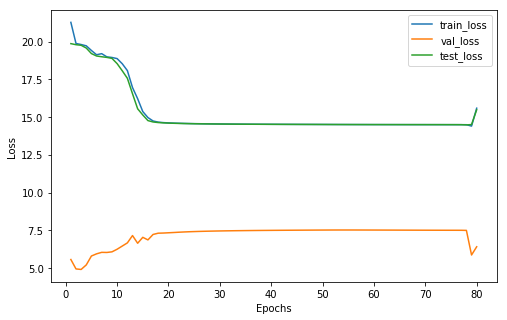

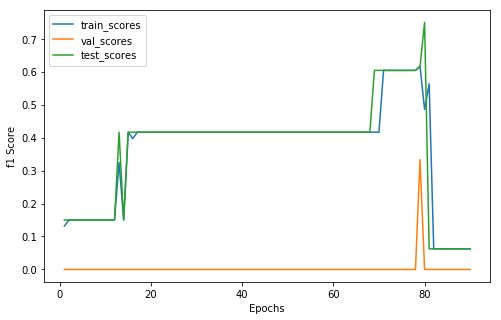

xxxxxxxxxxxxxx epoch: 90 xxxxxxxxxxxxxx


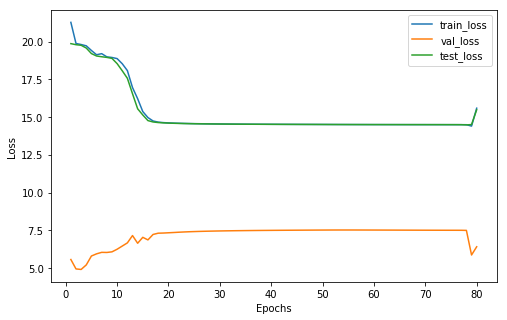

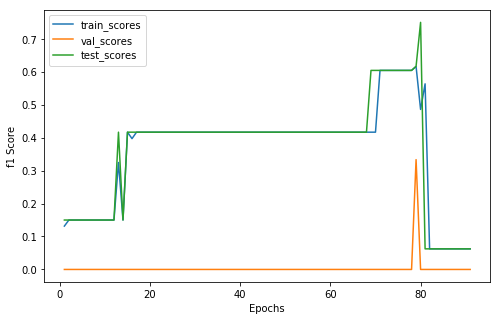

xxxxxxxxxxxxxx epoch: 91 xxxxxxxxxxxxxx


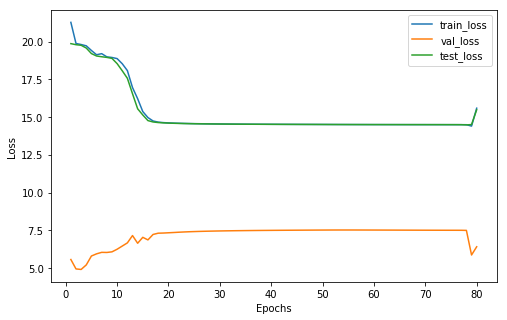

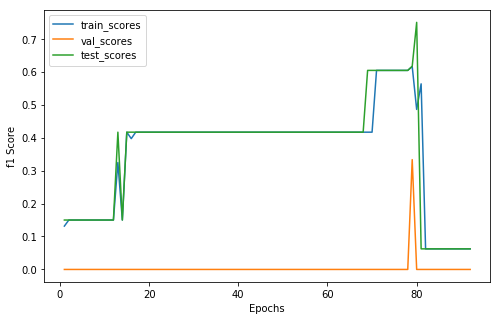

xxxxxxxxxxxxxx epoch: 92 xxxxxxxxxxxxxx


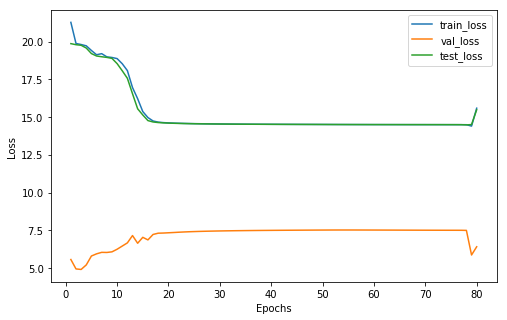

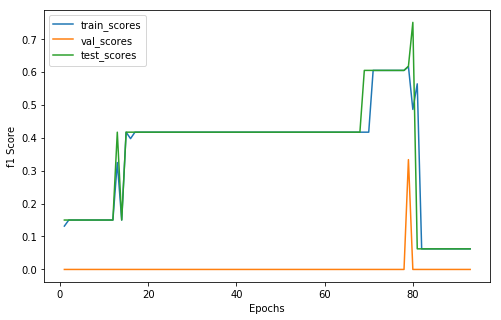

xxxxxxxxxxxxxx epoch: 93 xxxxxxxxxxxxxx


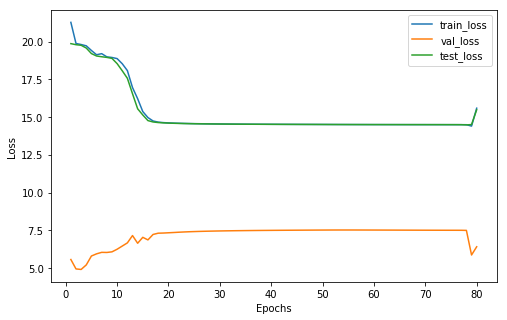

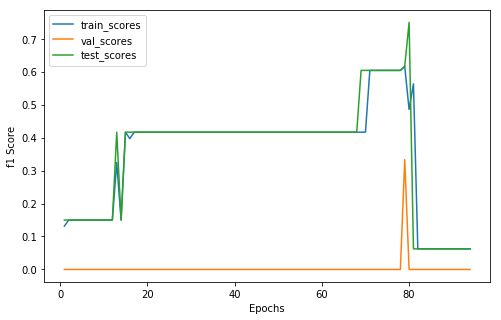

xxxxxxxxxxxxxx epoch: 94 xxxxxxxxxxxxxx


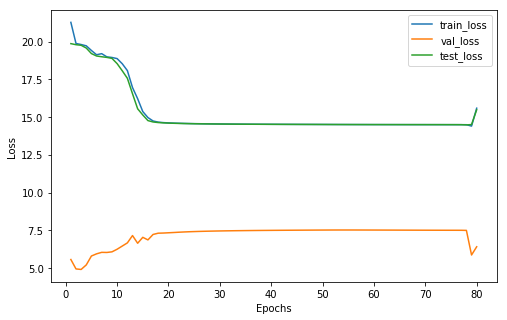

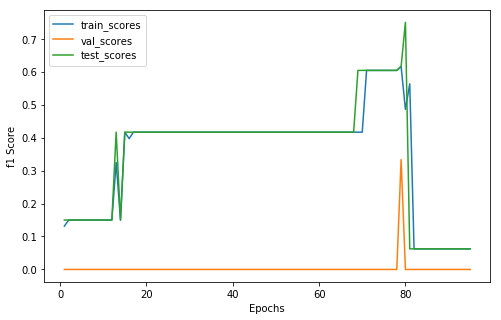

xxxxxxxxxxxxxx epoch: 95 xxxxxxxxxxxxxx


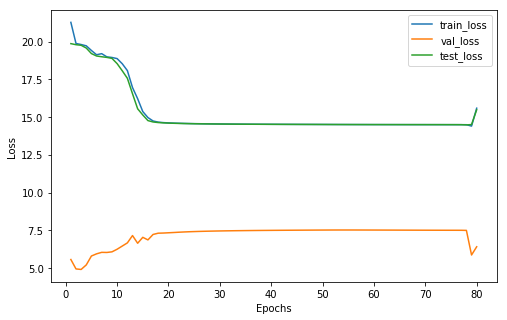

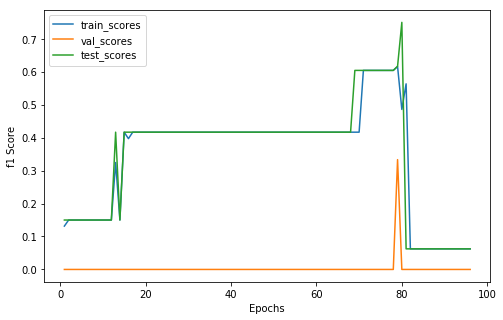

xxxxxxxxxxxxxx epoch: 96 xxxxxxxxxxxxxx


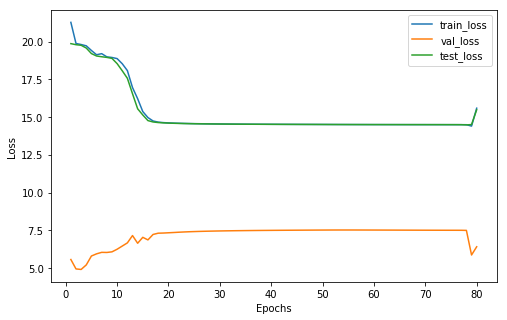

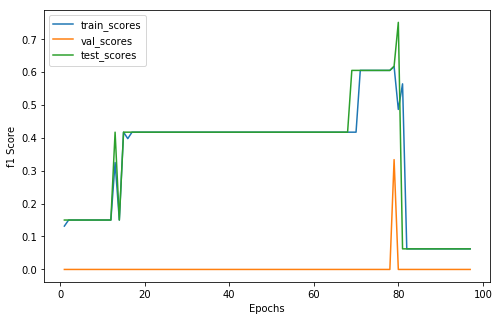

xxxxxxxxxxxxxx epoch: 97 xxxxxxxxxxxxxx


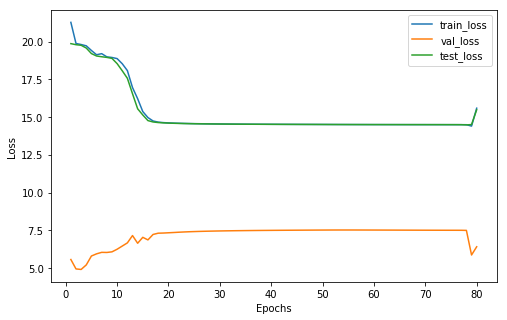

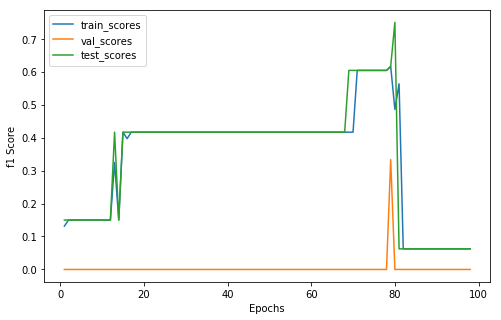

xxxxxxxxxxxxxx epoch: 98 xxxxxxxxxxxxxx


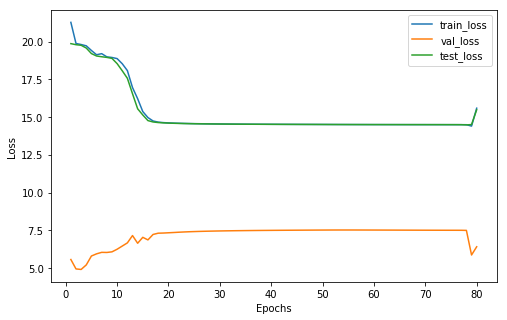

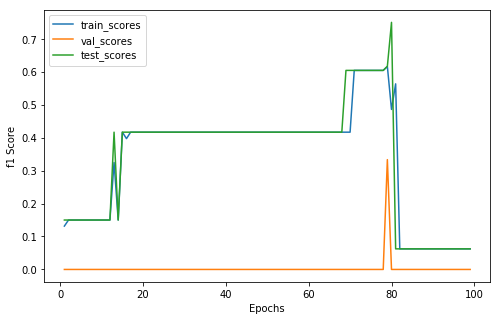

xxxxxxxxxxxxxx epoch: 99 xxxxxxxxxxxxxx


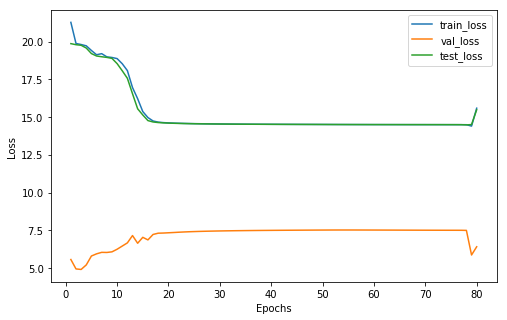

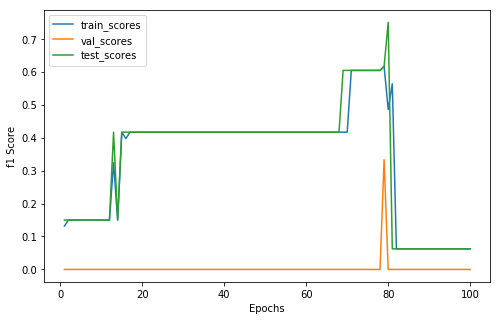

xxxxxxxxxxxxxx epoch: 100 xxxxxxxxxxxxxx


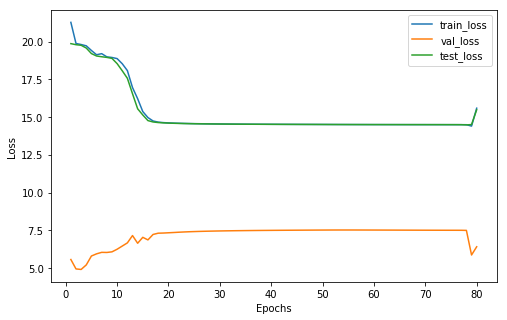

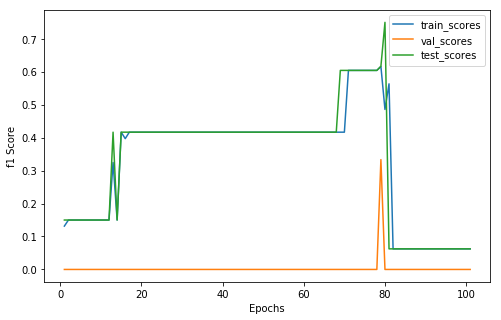

xxxxxxxxxxxxxx epoch: 101 xxxxxxxxxxxxxx


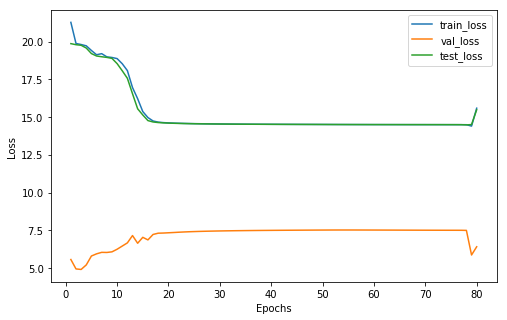

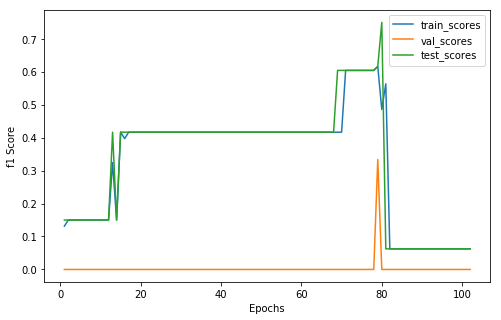

xxxxxxxxxxxxxx epoch: 102 xxxxxxxxxxxxxx


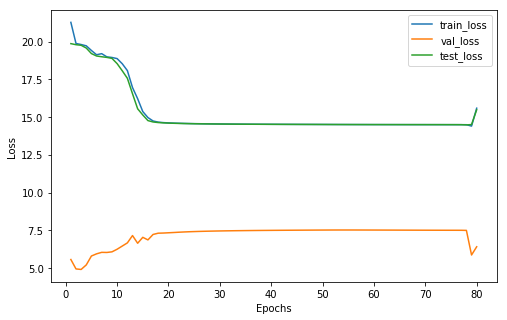

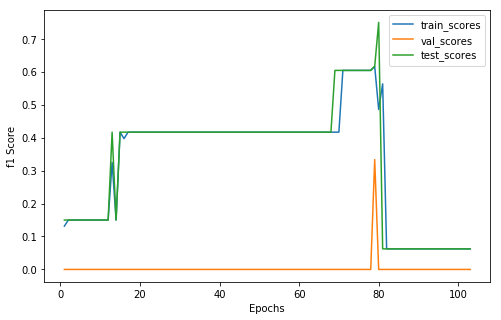

xxxxxxxxxxxxxx epoch: 103 xxxxxxxxxxxxxx


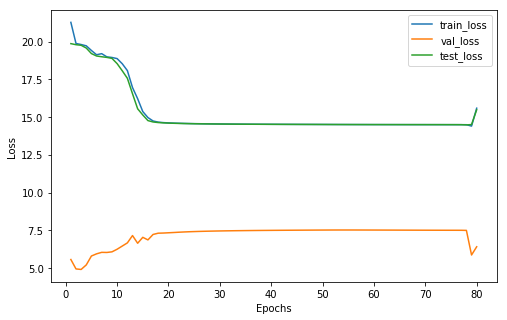

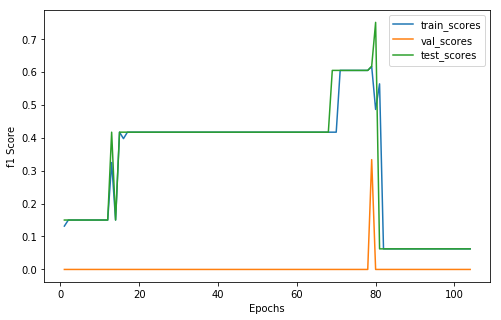

xxxxxxxxxxxxxx epoch: 104 xxxxxxxxxxxxxx


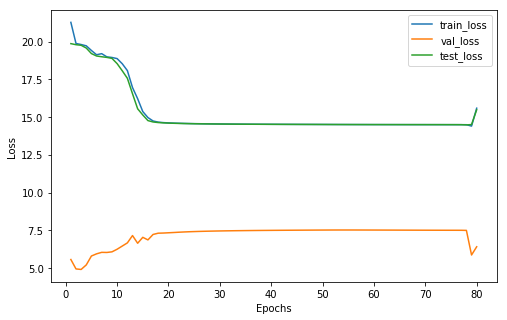

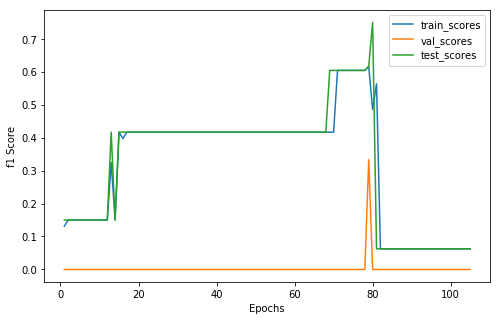

xxxxxxxxxxxxxx epoch: 105 xxxxxxxxxxxxxx


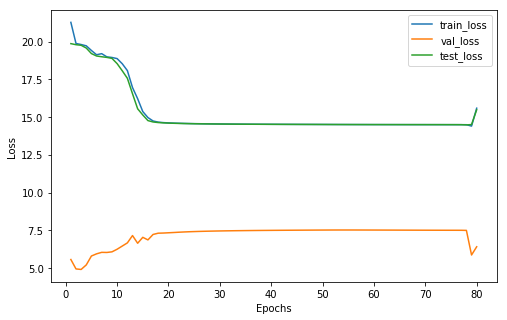

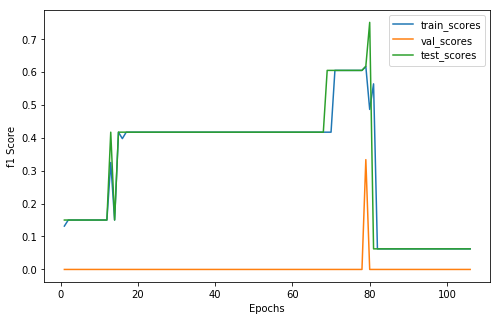

xxxxxxxxxxxxxx epoch: 106 xxxxxxxxxxxxxx


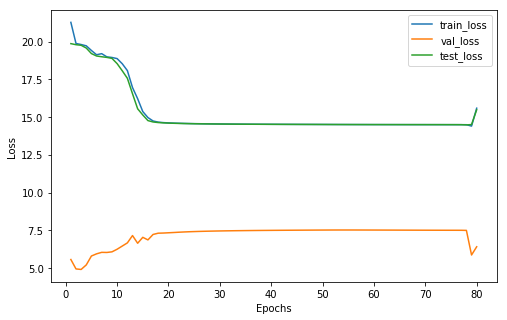

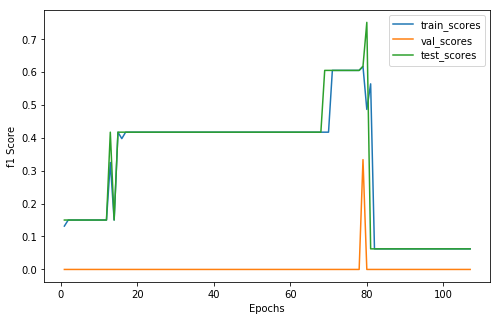

xxxxxxxxxxxxxx epoch: 107 xxxxxxxxxxxxxx


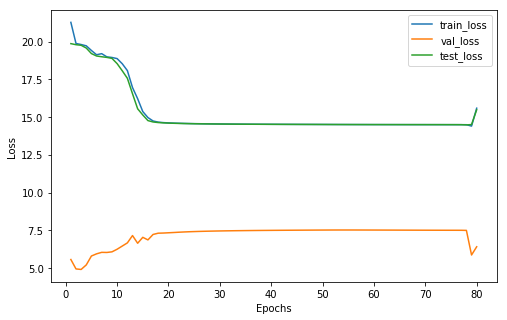

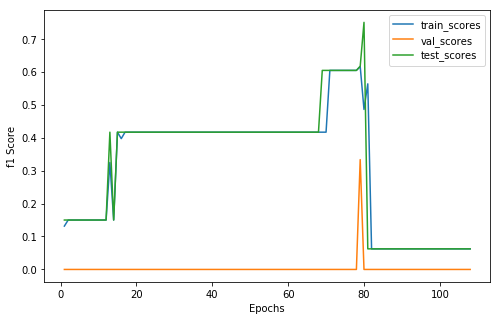

xxxxxxxxxxxxxx epoch: 108 xxxxxxxxxxxxxx


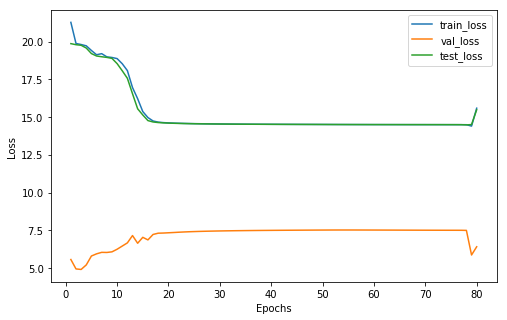

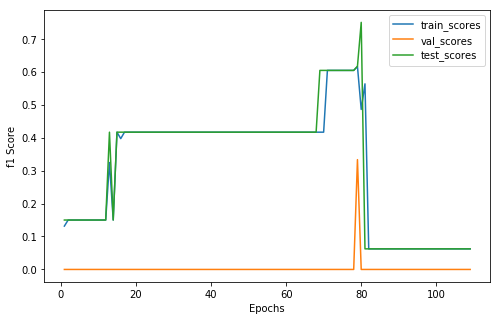

xxxxxxxxxxxxxx epoch: 109 xxxxxxxxxxxxxx


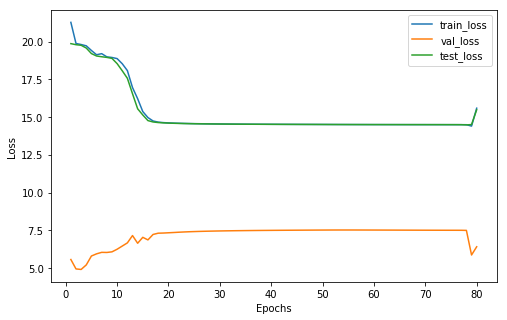

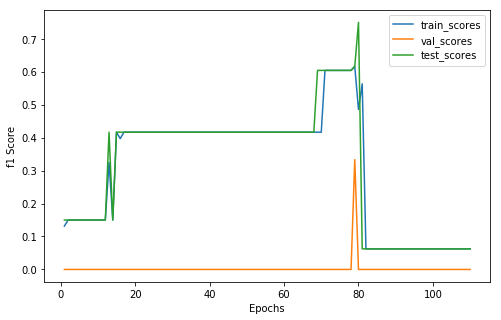

xxxxxxxxxxxxxx epoch: 110 xxxxxxxxxxxxxx


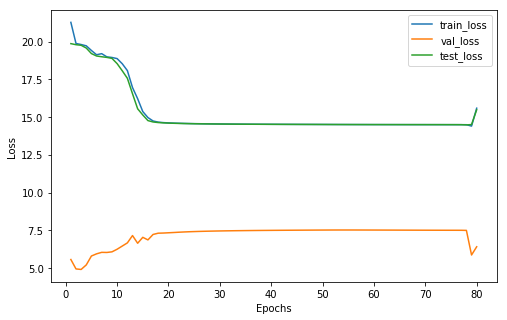

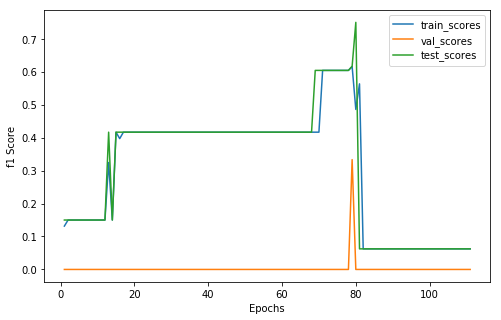

xxxxxxxxxxxxxx epoch: 111 xxxxxxxxxxxxxx


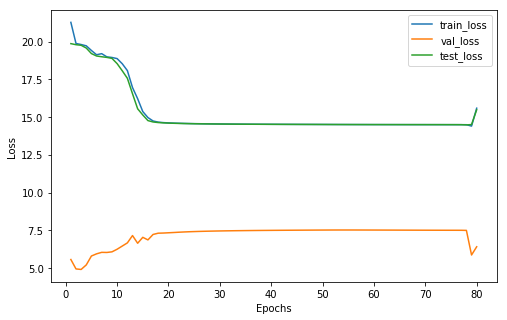

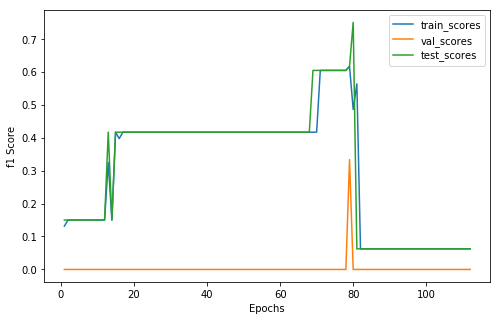

xxxxxxxxxxxxxx epoch: 112 xxxxxxxxxxxxxx


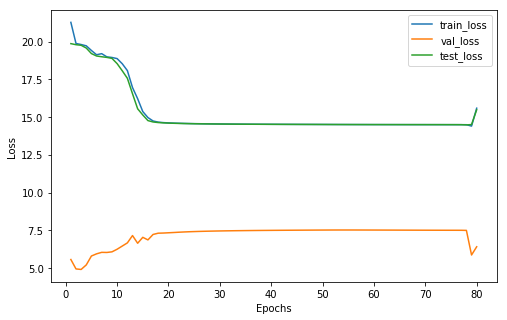

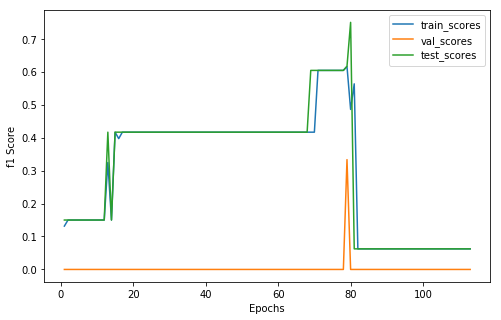

xxxxxxxxxxxxxx epoch: 113 xxxxxxxxxxxxxx


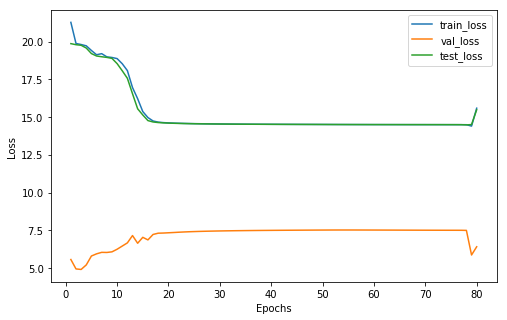

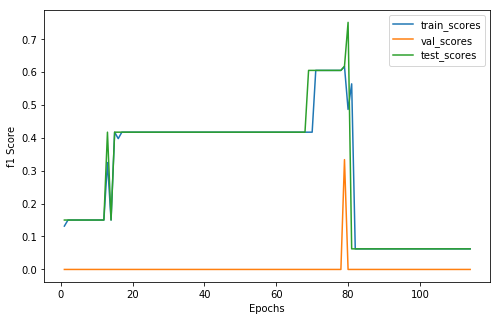

xxxxxxxxxxxxxx epoch: 114 xxxxxxxxxxxxxx


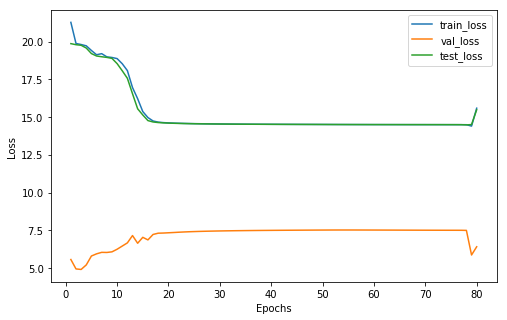

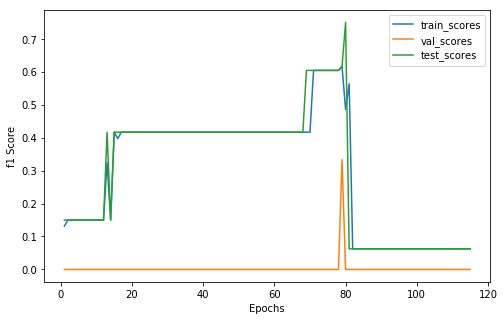

xxxxxxxxxxxxxx epoch: 115 xxxxxxxxxxxxxx


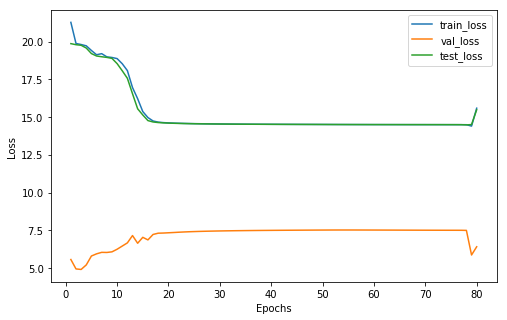

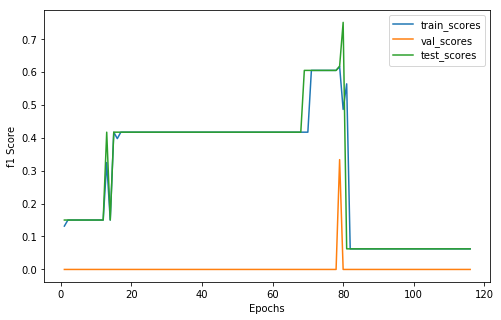

xxxxxxxxxxxxxx epoch: 116 xxxxxxxxxxxxxx


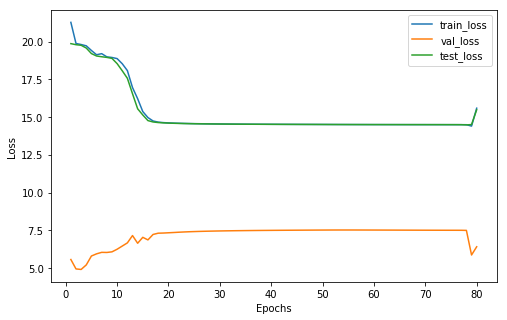

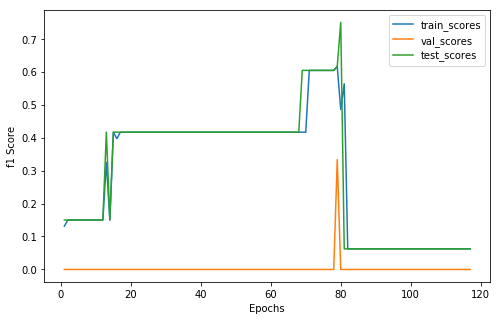

xxxxxxxxxxxxxx epoch: 117 xxxxxxxxxxxxxx


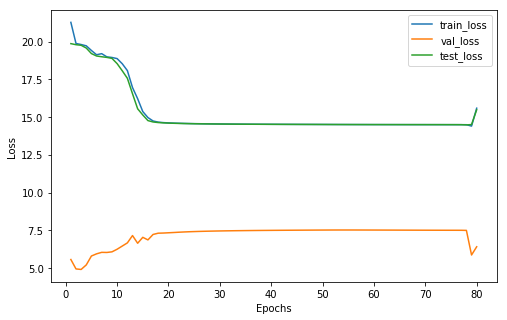

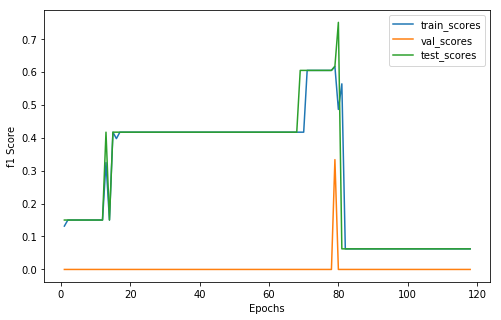

xxxxxxxxxxxxxx epoch: 118 xxxxxxxxxxxxxx


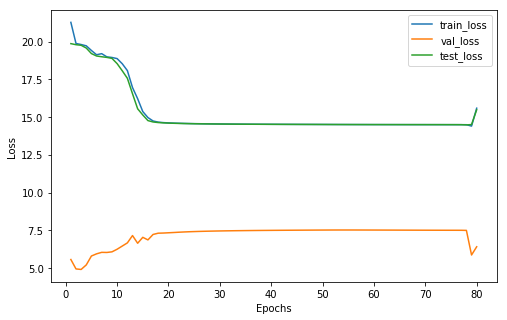

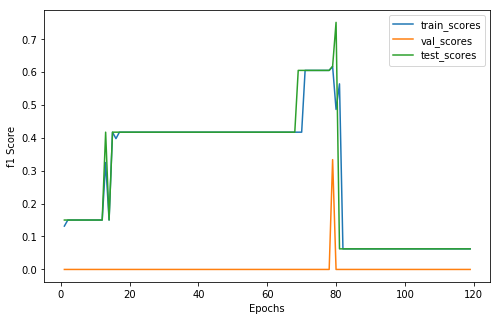

xxxxxxxxxxxxxx epoch: 119 xxxxxxxxxxxxxx


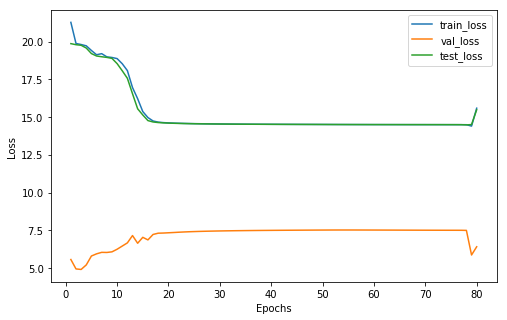

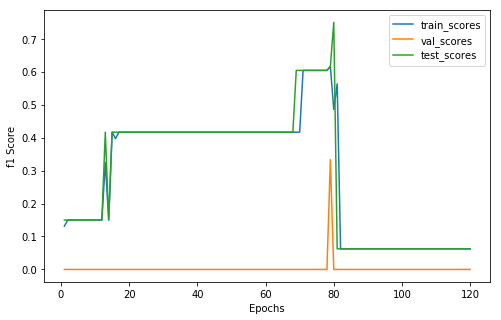

xxxxxxxxxxxxxx epoch: 120 xxxxxxxxxxxxxx


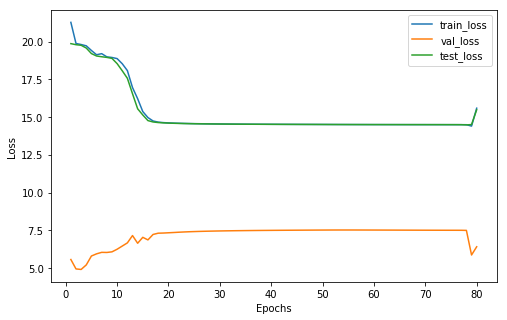

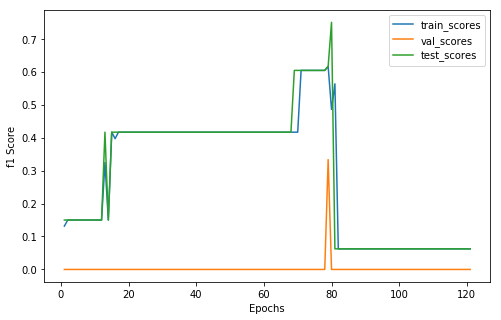

xxxxxxxxxxxxxx epoch: 121 xxxxxxxxxxxxxx


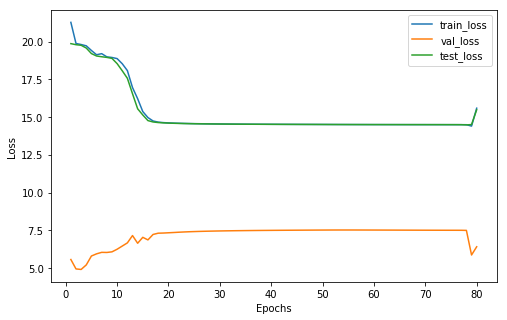

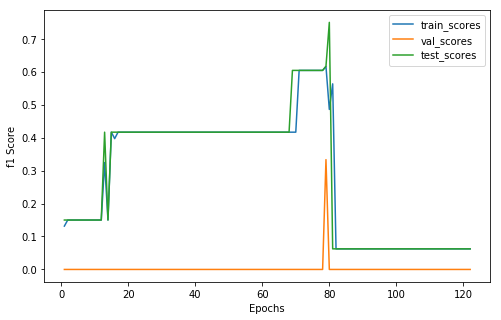

xxxxxxxxxxxxxx epoch: 122 xxxxxxxxxxxxxx


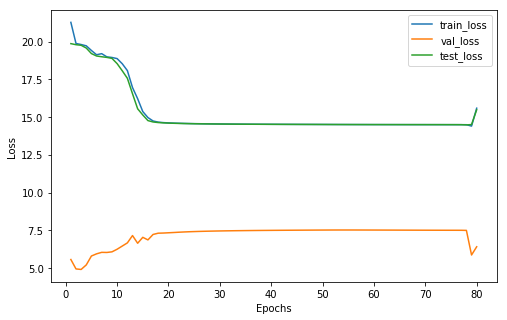

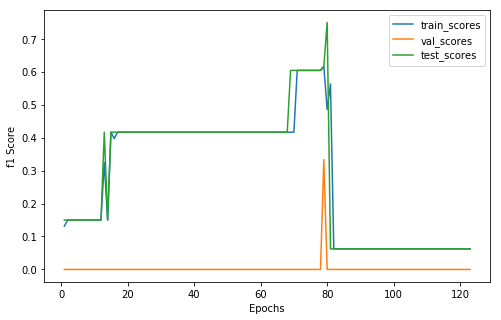

xxxxxxxxxxxxxx epoch: 123 xxxxxxxxxxxxxx


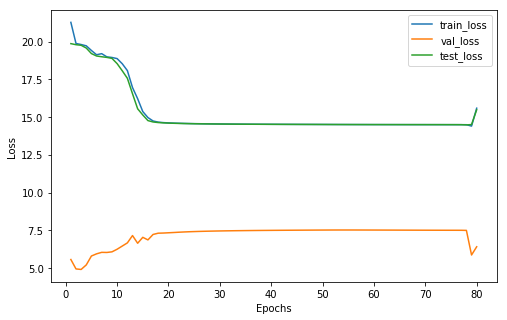

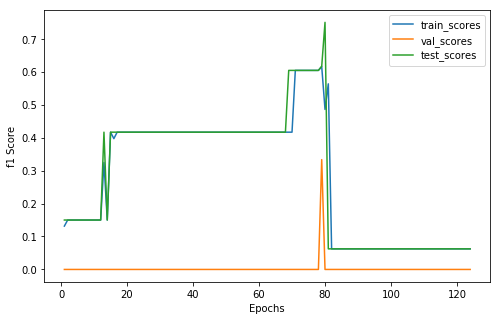

xxxxxxxxxxxxxx epoch: 124 xxxxxxxxxxxxxx


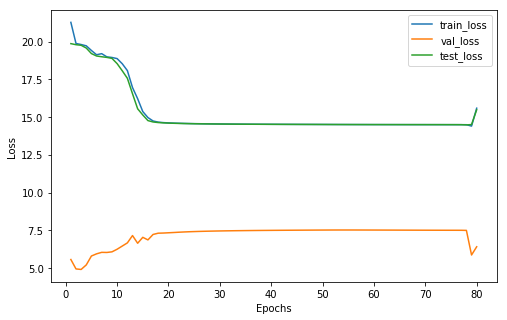

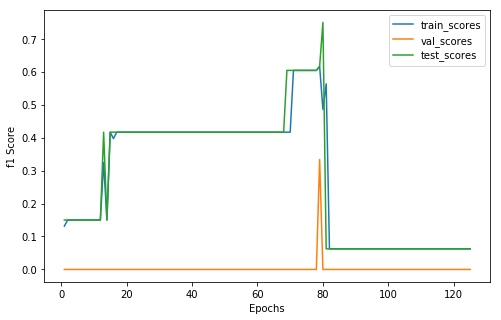

xxxxxxxxxxxxxx epoch: 125 xxxxxxxxxxxxxx


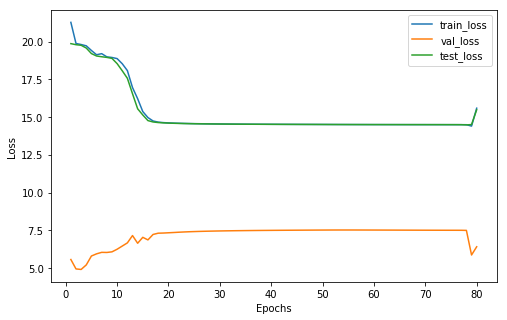

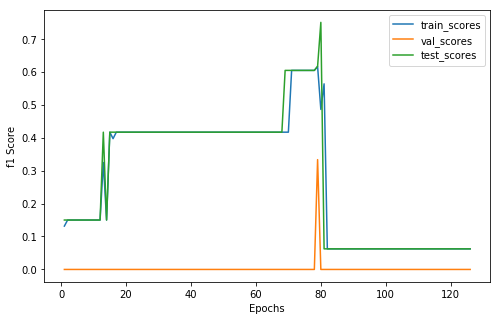

xxxxxxxxxxxxxx epoch: 126 xxxxxxxxxxxxxx


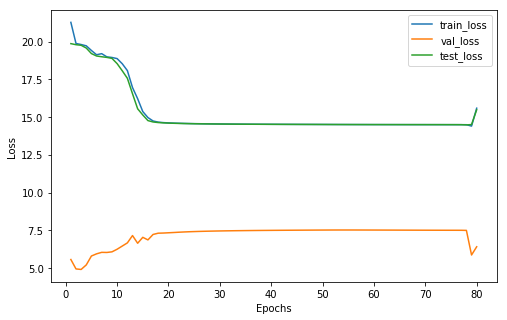

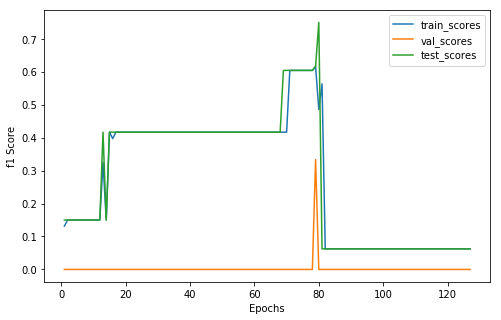

xxxxxxxxxxxxxx epoch: 127 xxxxxxxxxxxxxx


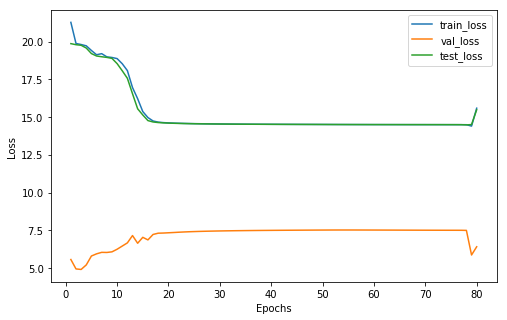

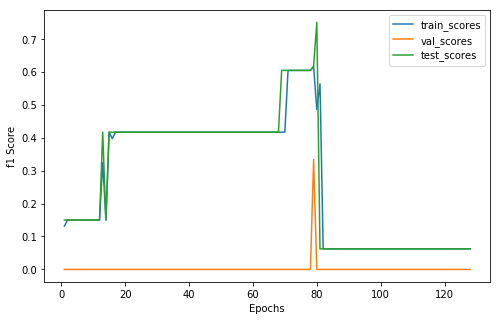

xxxxxxxxxxxxxx epoch: 128 xxxxxxxxxxxxxx


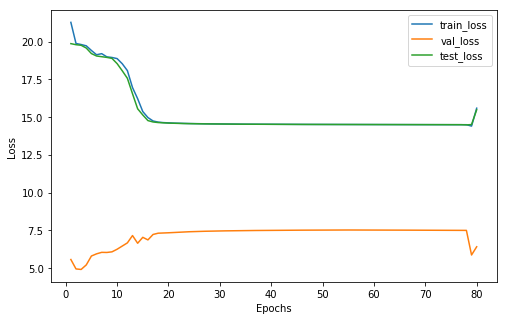

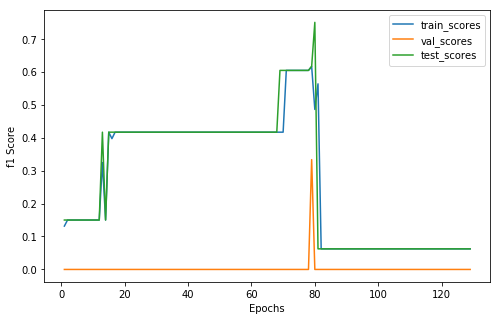

xxxxxxxxxxxxxx epoch: 129 xxxxxxxxxxxxxx


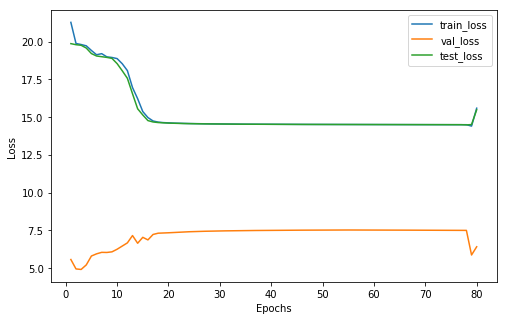

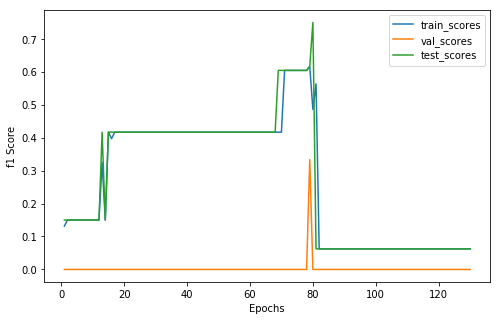

xxxxxxxxxxxxxx epoch: 130 xxxxxxxxxxxxxx


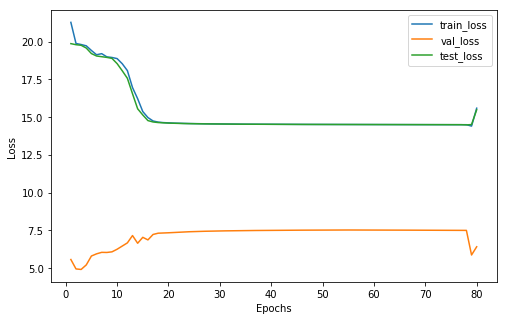

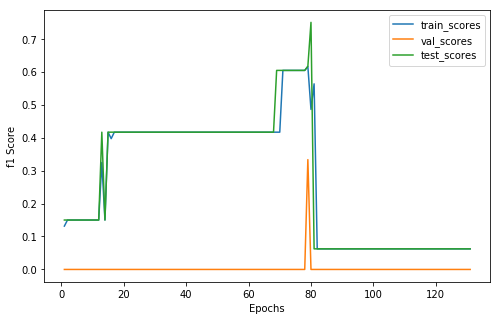

xxxxxxxxxxxxxx epoch: 131 xxxxxxxxxxxxxx


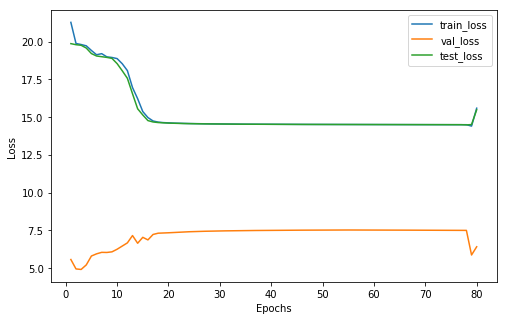

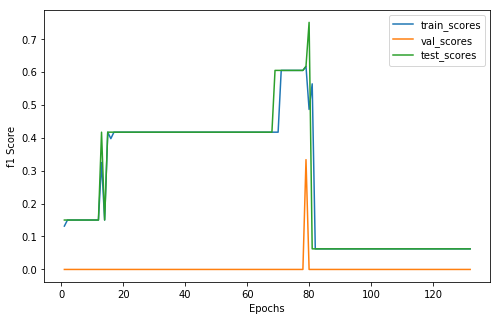

xxxxxxxxxxxxxx epoch: 132 xxxxxxxxxxxxxx


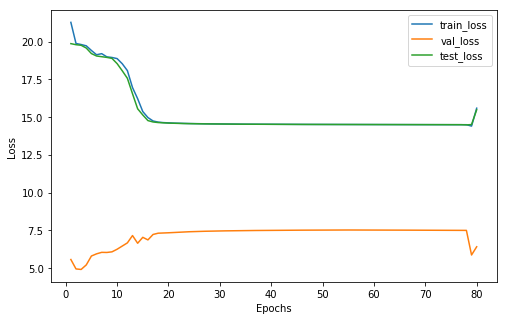

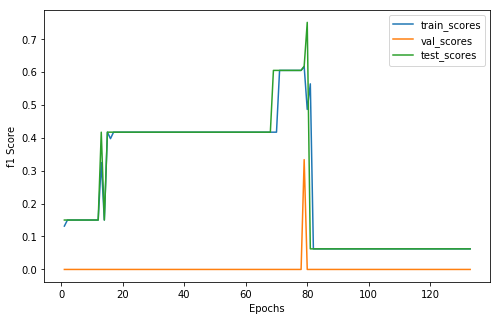

xxxxxxxxxxxxxx epoch: 133 xxxxxxxxxxxxxx


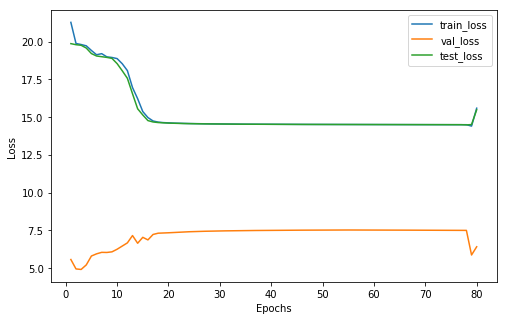

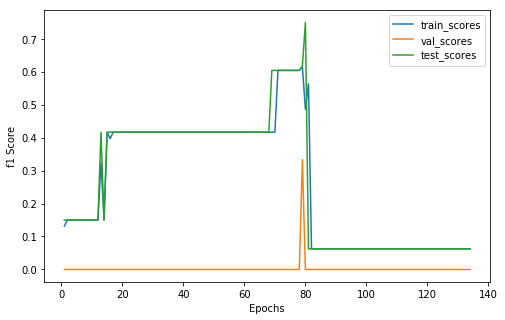

xxxxxxxxxxxxxx epoch: 134 xxxxxxxxxxxxxx


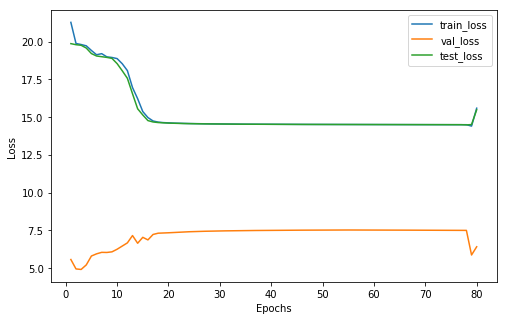

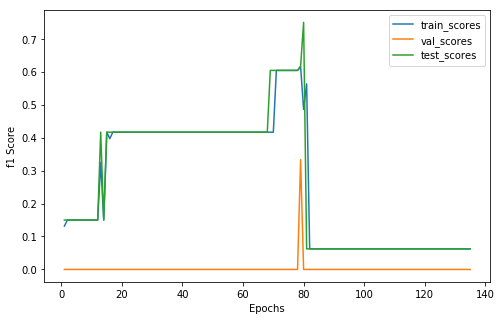

xxxxxxxxxxxxxx epoch: 135 xxxxxxxxxxxxxx


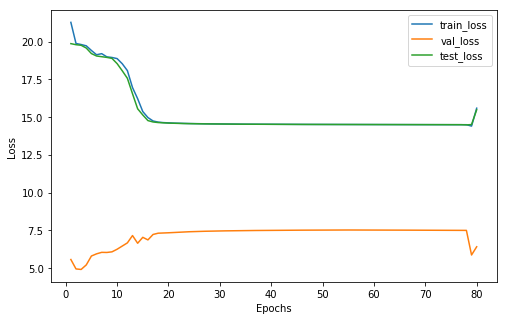

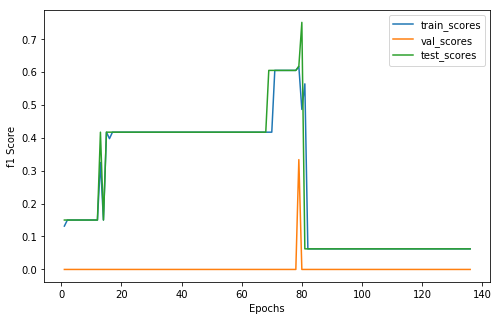

xxxxxxxxxxxxxx epoch: 136 xxxxxxxxxxxxxx


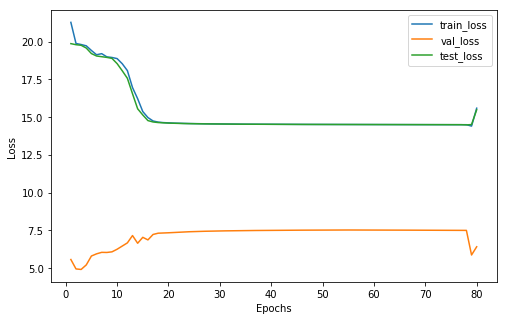

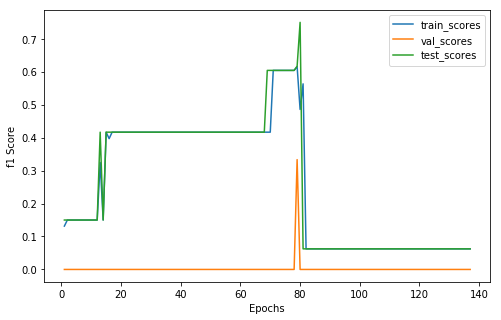

xxxxxxxxxxxxxx epoch: 137 xxxxxxxxxxxxxx


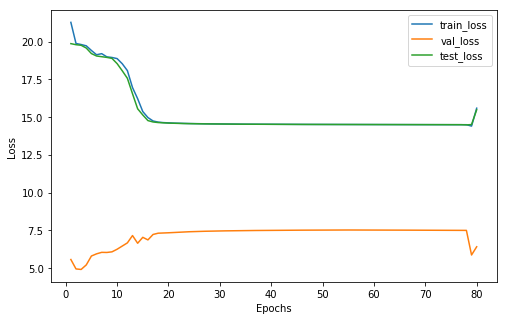

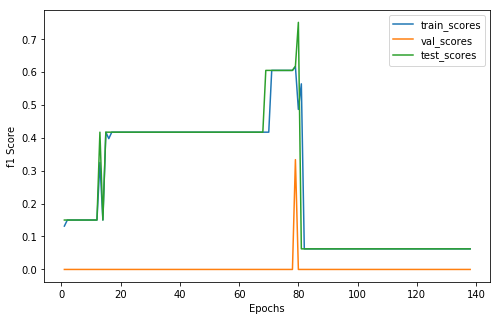

xxxxxxxxxxxxxx epoch: 138 xxxxxxxxxxxxxx


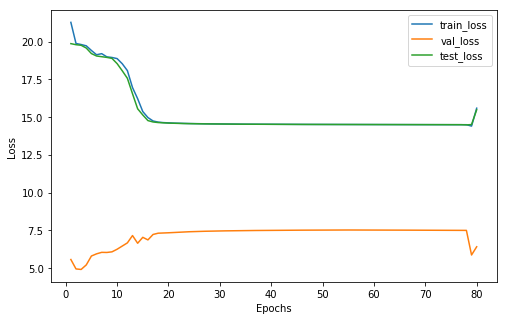

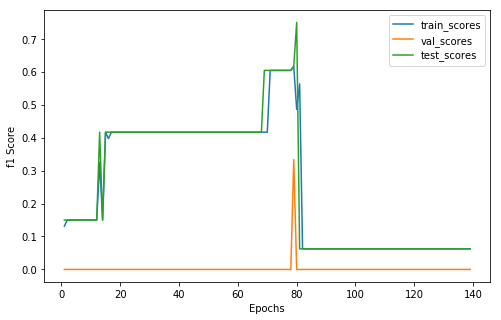

xxxxxxxxxxxxxx epoch: 139 xxxxxxxxxxxxxx


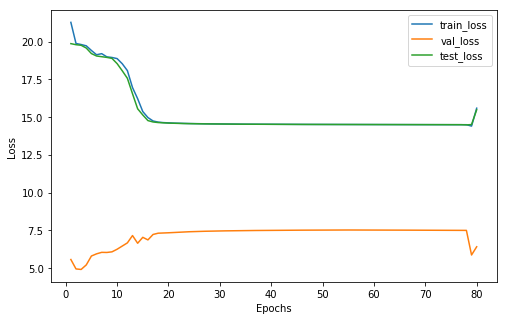

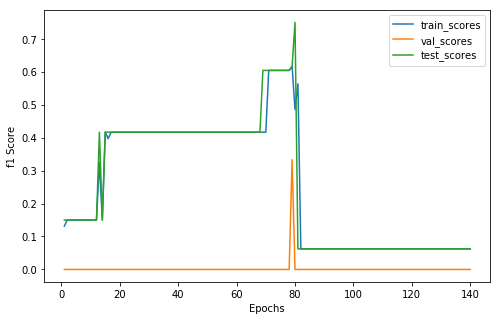

xxxxxxxxxxxxxx epoch: 140 xxxxxxxxxxxxxx


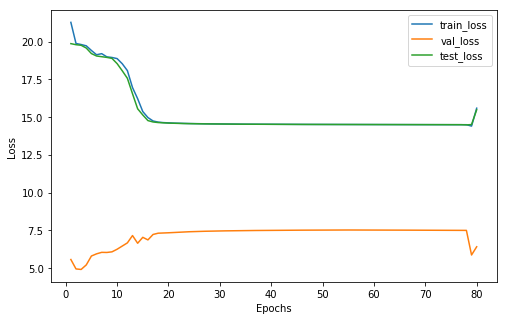

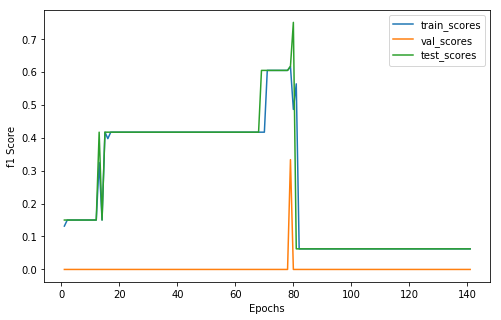

xxxxxxxxxxxxxx epoch: 141 xxxxxxxxxxxxxx


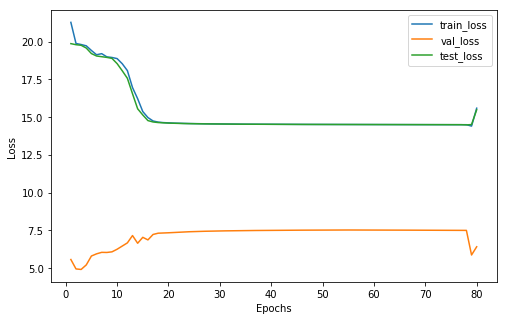

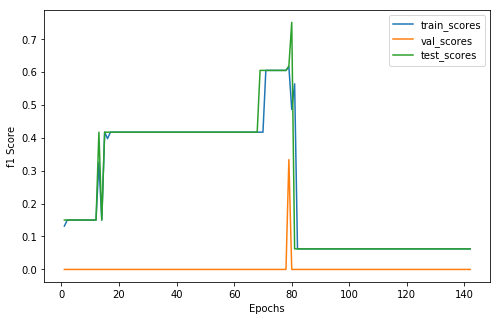

xxxxxxxxxxxxxx epoch: 142 xxxxxxxxxxxxxx


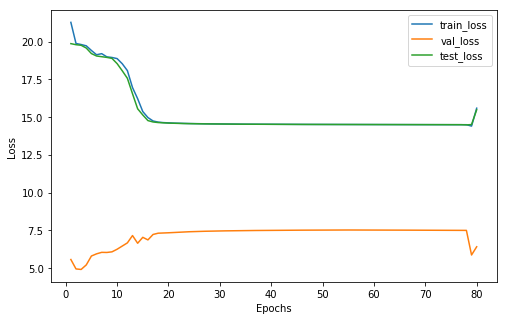

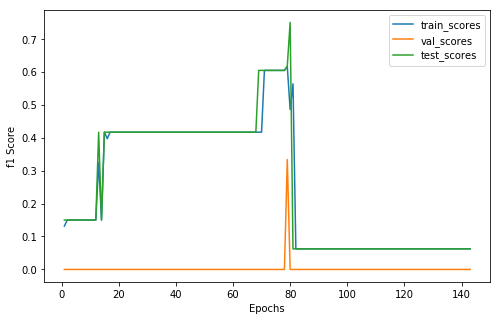

xxxxxxxxxxxxxx epoch: 143 xxxxxxxxxxxxxx


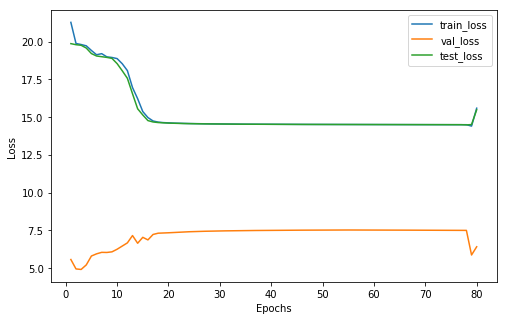

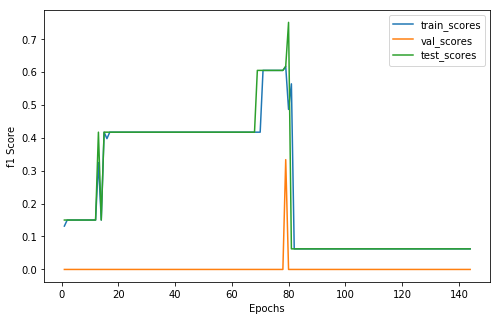

xxxxxxxxxxxxxx epoch: 144 xxxxxxxxxxxxxx


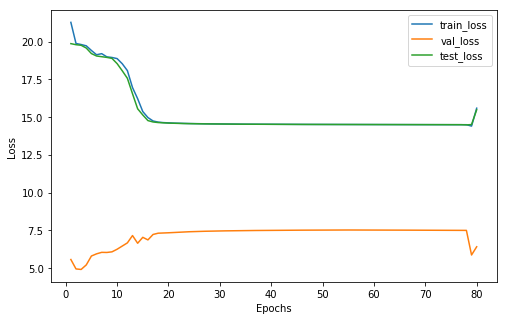

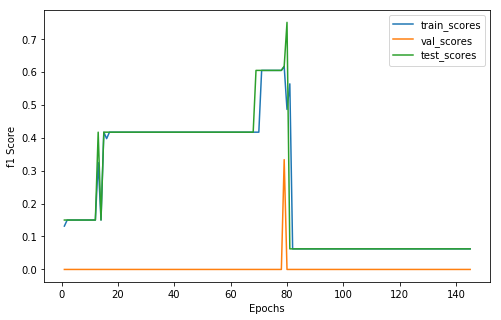

xxxxxxxxxxxxxx epoch: 145 xxxxxxxxxxxxxx


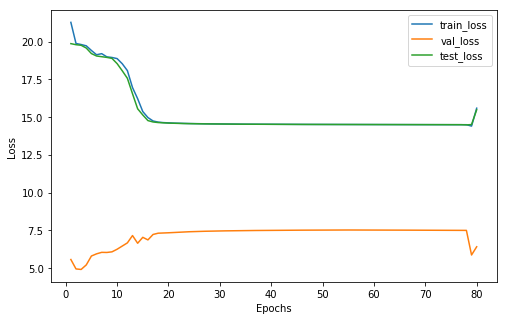

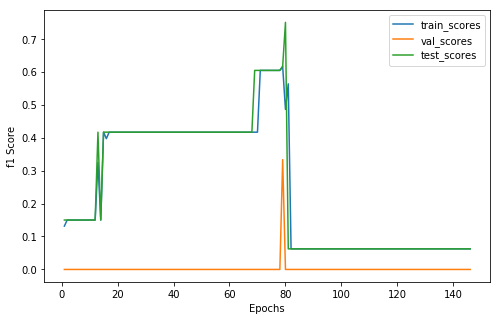

xxxxxxxxxxxxxx epoch: 146 xxxxxxxxxxxxxx


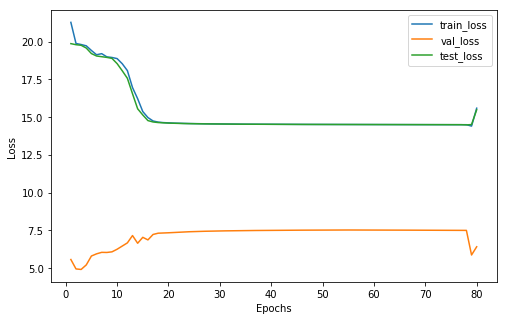

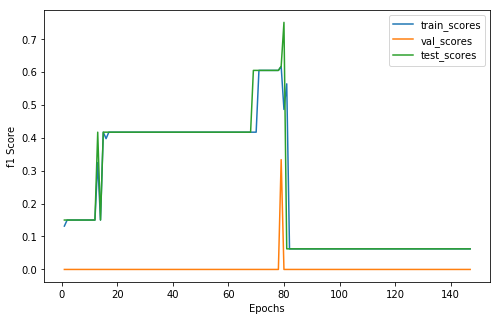

xxxxxxxxxxxxxx epoch: 147 xxxxxxxxxxxxxx


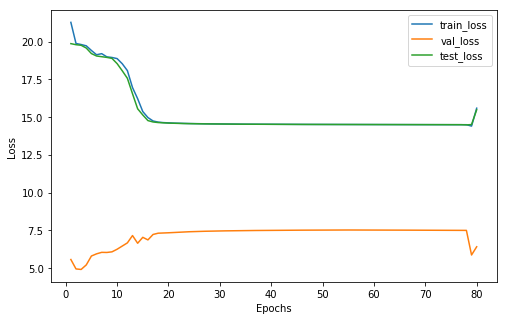

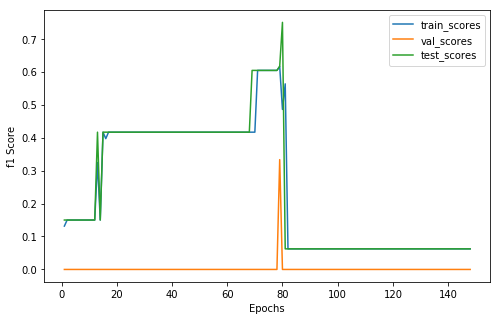

xxxxxxxxxxxxxx epoch: 148 xxxxxxxxxxxxxx


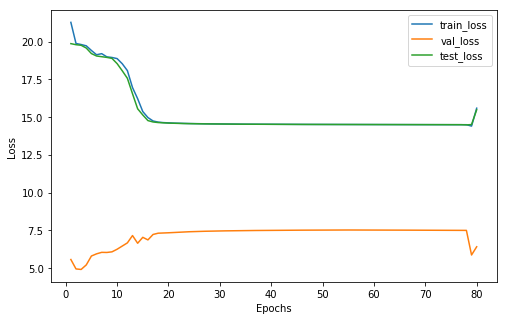

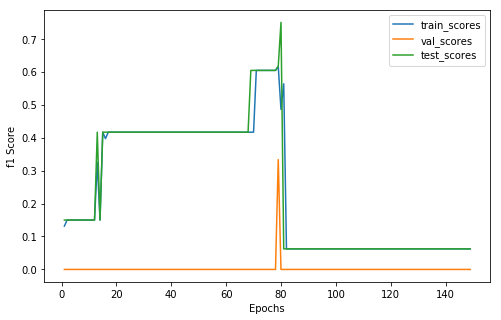

xxxxxxxxxxxxxx epoch: 149 xxxxxxxxxxxxxx


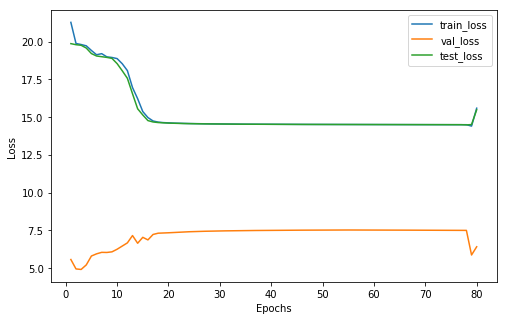

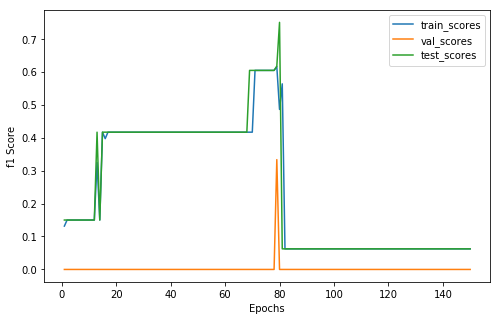

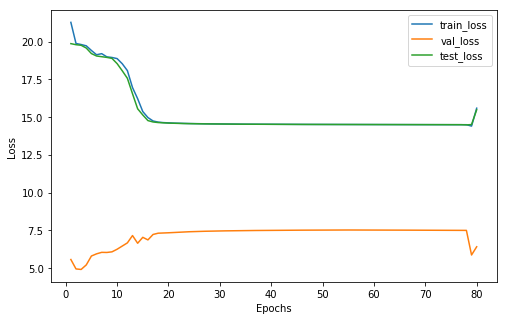

In [9]:
loss_over_epochs = {
    "train_loss" : [],
    "val_loss" : [],
    "test_loss" : []
}

scores_over_epochs = {
    "train_scores" : [],
    "val_scores" : [],
    "test_scores" : []
}

for epoch in range(n_epochs):
    print("xxxxxxxxxxxxxx epoch: {} xxxxxxxxxxxxxx".format(epoch))
    train_loss, train_labels, train_preds =  trainer.evaluate_set(data, 'train_ids', model, criterion, optimizer)
    val_loss, val_labels, val_preds =  trainer.evaluate_set(data, 'val_ids', model, criterion)
    test_loss, test_labels, test_preds =  trainer.evaluate_set(data, 'train_ids', model, criterion)
    
    loss_over_epochs['train_loss'].append(train_loss)
    loss_over_epochs['val_loss'].append(val_loss)
    loss_over_epochs['test_loss'].append(test_loss)
    
    scores_over_epochs['train_scores'].append(metrics.precision_recall_fscore_support(train_labels,
                                                                                     train_preds, 
                                                                                     average='macro'))
    scores_over_epochs['val_scores'].append(metrics.precision_recall_fscore_support(val_labels, 
                                                                                   val_preds, 
                                                                                   average='macro'))
    scores_over_epochs['test_scores'].append( metrics.precision_recall_fscore_support(test_labels,
                                                                                     test_preds,
                                                                                     average='macro'))
    
    plotting.plot_score_over_n_epochs(scores_over_epochs, score_type='f1', fig_size=(8,5))
    plotting.plot_loss_over_n_epochs(loss_over_epochs, fig_size=(8, 5))
    
    
    
    
    
    

In [ ]:
print(len(data['train_ids']))
print(len(data['val_ids']))
print(len(data['test_ids']))